In [2]:
# To be able to make edits to repo without having to restart notebook
%load_ext autoreload
%autoreload 2

In [3]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, mannwhitneyu, wilcoxon, ttest_rel, ttest_ind
import seaborn as sns

PROJECT_PATH = os.getcwd()
sys.path.append(PROJECT_PATH)

In [4]:
folder = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\GusData\processed"

# iterate thru subfolders
subdirs = np.sort([ f.path for f in os.scandir(folder) if f.is_dir() ])
df = None
for subdir in subdirs:
    # go into folder called remapping_output
    remapping_output = subdir + r'\remapping_output'
    if os.path.isdir(remapping_output):
        csv_file = remapping_output + r'\regular_remapping.xlsx'
        temporal_csv_file = remapping_output + r'\temporal_remapping.xlsx'
        context_morning_csv_file = remapping_output + r'\context_morning_remapping.xlsx'
        # context_afternoon_csv_file = remapping_output + r'\context_afternoon_remapping.xlsx'
        context_morning_temporal_csv_file = remapping_output + r'\context_morning_temporal_remapping.xlsx'
        # context_afternoon_temporal_csv_file = remapping_output + r'\context_afternoon_temporal_remapping.xlsx'

        # read in csv file
        df_to_add = pd.read_excel(csv_file)
        df_temporal_to_add = pd.read_excel(temporal_csv_file)
        # df_context_morning_to_add = pd.read_excel(context_morning_csv_file)
        # df_context_afternoon_to_add = pd.read_excel(context_afternoon_csv_file)
        # df_context_morning_temporal_to_add = pd.read_excel(context_morning_temporal_csv_file)
        # df_context_afternoon_temporal_to_add = pd.read_excel(context_afternoon_temporal_csv_file)

        # concate unique columns in df_to_add to df
        df_to_add = df_to_add.drop(columns=['Unnamed: 0'])
        df_temporal_to_add = df_temporal_to_add.drop(columns=['Unnamed: 0'])
        # drop fr_rate, ratio and change
        df_to_add = df_to_add.drop(columns=['fr_rate', 'fr_rate_ratio', 'fr_rate_change'])
        df_to_add = pd.concat([df_to_add, df_temporal_to_add], axis=1)
        # drop duplicate columns
        df_to_add = df_to_add.loc[:,~df_to_add.columns.duplicated()]

        # df_context_morning_to_add = df_context_morning_to_add.drop(columns=['Unnamed: 0'])
        # df_context_afternoon_to_add = df_context_afternoon_to_add.drop(columns=['Unnamed: 0'])
        # df_context_morning_temporal_to_add = df_context_morning_temporal_to_add.drop(columns=['Unnamed: 0'])
        # df_context_afternoon_temporal_to_add = df_context_afternoon_temporal_to_add.drop(columns=['Unnamed: 0'])
        # df_context_morning_to_add = df_context_morning_to_add.drop(columns=['fr_rate', 'fr_rate_ratio', 'fr_rate_change'])
        # df_context_afternoon_to_add = df_context_afternoon_to_add.drop(columns=['fr_rate', 'fr_rate_ratio', 'fr_rate_change'])
        # df_context_morning_to_add = pd.concat([df_context_morning_to_add, df_context_morning_temporal_to_add], axis=1)
        # df_context_afternoon_to_add = pd.concat([df_context_afternoon_to_add, df_context_afternoon_temporal_to_add], axis=1)
        # df_context_morning_to_add = df_context_morning_to_add.loc[:,~df_context_morning_to_add.columns.duplicated()]
        # df_context_afternoon_to_add = df_context_afternoon_to_add.loc[:,~df_context_afternoon_to_add.columns.duplicated()]

        # df_to_add = pd.concat([df_to_add, df_context_morning_to_add], axis=0)
        # ,df_context_afternoon_to_add

        if df is None:
            df = df_to_add
        else:
            df = df.append(df_to_add, ignore_index=True)

C:\Users\aaoun\AppData\Local\Temp\ipykernel_16436\3788895814.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_add, ignore_index=True)
C:\Users\aaoun\AppData\Local\Temp\ipykernel_16436\3788895814.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_add, ignore_index=True)
C:\Users\aaoun\AppData\Local\Temp\ipykernel_16436\3788895814.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_add, ignore_index=True)
C:\Users\aaoun\AppData\Local\Temp\ipykernel_16436\3788895814.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_add, ignore_index=True)
C:\Users

In [5]:
df = pd.read_excel(r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit\_prototypes\cell_remapping\full_32_1000.xlsx")

In [6]:
df.columns

Index(['Unnamed: 0', 'signature', 'depth', 'name', 'date', 'tetrode',
       'unit_id', 'session_ids', 'whole_wass', 'z_score', 'base_mean',
       'base_std', 'mod_z_score', 'median', 'mad', 'quantile', 'plower',
       'phigher', 'ptwotail', 'sd_wass', 'n_repeats', 'arena_size', 'cylinder',
       'ratemap_dims', 'downsample_factor', 'emd', 'fr_rate', 'fr_rate_ratio',
       'fr_rate_change', 'p_value', 'spike_density_wass', 'app_vs_control',
       'group'],
      dtype='object')

In [7]:
df['session_ids'].unique()

array(["['session_1', 'session_2']", "['session_2', 'session_3']",
       "['session_3', 'session_4']"], dtype=object)

In [8]:
# make all p_values 1 - current p_values
# df['p_value'] = (1 - abs(df['p_value']))/2
df['p_value'] = df['phigher']

In [9]:
for index, row in df.iterrows():
    # print if significant p_value
    if row['p_value'] <= 0.025 or row['p_value'] >= 0.975:
        print(row['signature'], row['name'], row['tetrode'], row['session_ids'], row['unit_id'], row['whole_wass'], row['base_mean'],row['spike_density_wass'])

# app_ki = ['1-13', '1-14', '1a27', '1-30', '1a35', '1a37']
# control = ['1-20'to_, '1-24', '1-25', '1-28', '1-34', '1a23', '1a40]


['1-13_20210511-18-50x50cm-1200um-Test3', '1-13_20210511-18-50x50cm-1200um-Test4'] 1-13 1 ['session_3', 'session_4'] 1 4.504737906415437 1.647158554411433 0.1362855069790652
['1-13_20210510-17-50x50cm-1200um-Test1', '1-13_20210510-17-50x50cm-1200um-Test2'] 1-13 1 ['session_1', 'session_2'] 2 4.33502772183038 2.572323381879416 0.092950350904711
['1-13_20210510-17-50x50cm-1200um-Test2', '1-13_20210511-18-50x50cm-1200um-Test3'] 1-13 1 ['session_2', 'session_3'] 2 4.067769098032509 2.459333718616707 0.05371135695767857
['1-13_20210511-18-50x50cm-1200um-Test3', '1-13_20210511-18-50x50cm-1200um-Test4'] 1-13 1 ['session_3', 'session_4'] 4 5.529905269888086 2.635769375136474 0.1400376671513495
['1-13_20210510-17-50x50cm-1200um-Test2', '1-13_20210511-18-50x50cm-1200um-Test3'] 1-13 2 ['session_2', 'session_3'] 2 1.171099567922045 0.574001014224358 0.06309971385694185
['1-13_20210511-18-50x50cm-1200um-Test3', '1-13_20210511-18-50x50cm-1200um-Test4'] 1-13 2 ['session_3', 'session_4'] 2 1.081178205

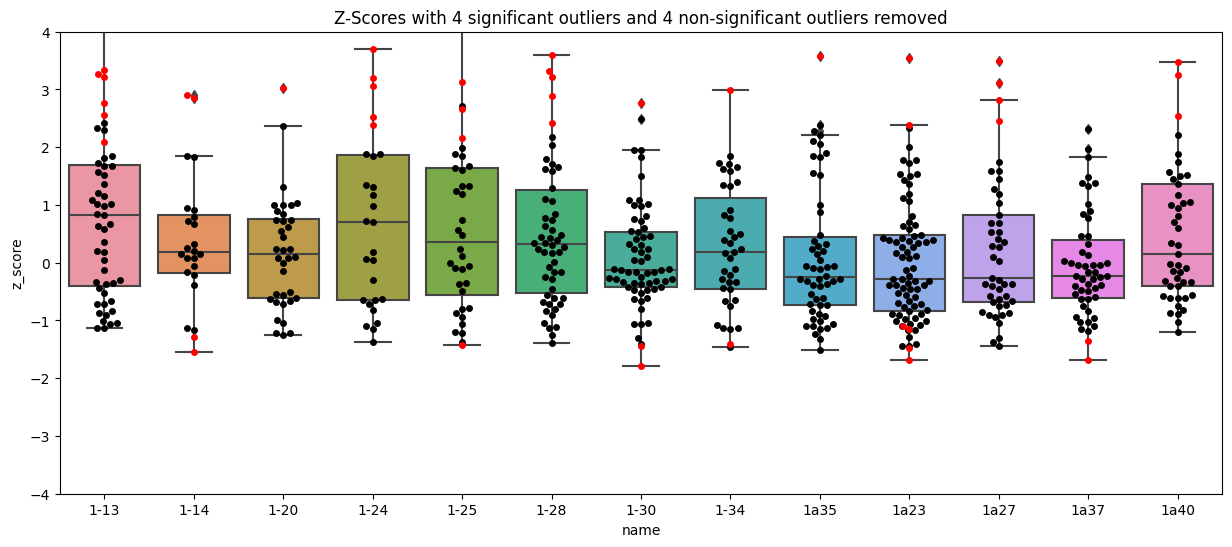

In [10]:
significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
non_significant_mask = ~significant_mask
sig_outlier_count = len(df[(df['z_score'] > 4) | (df['z_score'] < -4) & significant_mask])
nsig_outlier_count = len(df[(df['z_score'] > 4) | (df['z_score'] < -4) & non_significant_mask])
fig = plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="name", y="z_score", data=df)
sns.swarmplot(x="name", y="z_score", data=df[non_significant_mask], color="black", ax=ax)
sns.swarmplot(x="name", y="z_score", data=df[significant_mask], color="red", ax=ax)
plt.ylim(-4, 4)
plt.title('Z-Scores with {} significant outliers and {} non-significant outliers removed'.format(sig_outlier_count, nsig_outlier_count))
plt.show()

c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\Envs\envPRISM\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\Envs\envPRISM\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\Envs\envPRISM\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\Envs\envPRISM\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.3% of the points cannot be pla

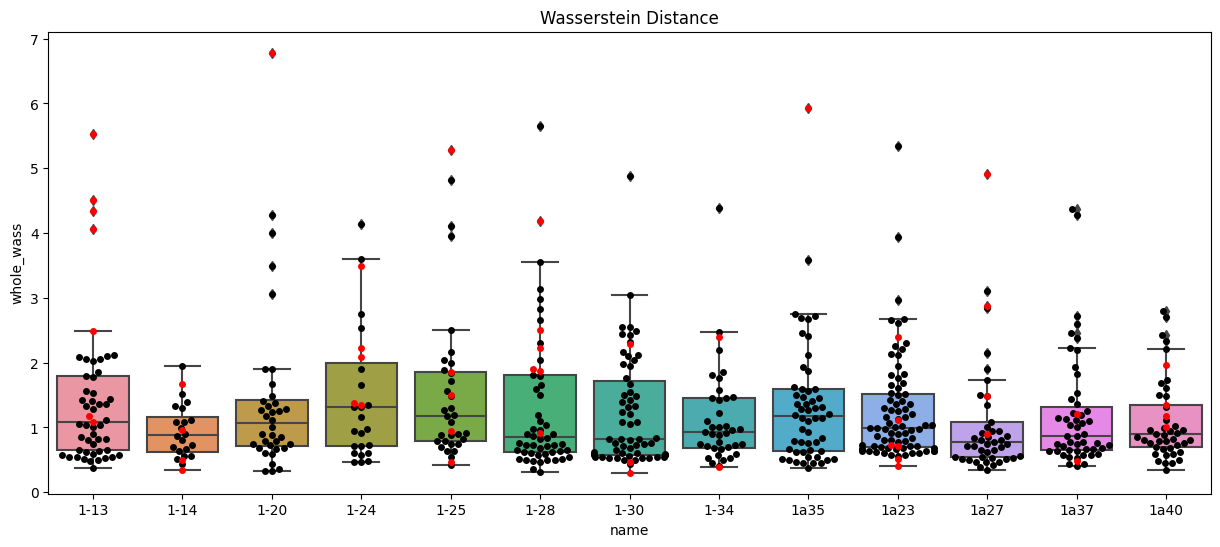

In [11]:
significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
non_significant_mask = ~significant_mask
fig = plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="name", y="whole_wass", data=df)
# reduce markersize
sns.swarmplot(x="name", y="whole_wass", data=df[non_significant_mask], color="black", ax=ax)
sns.swarmplot(x="name", y="whole_wass", data=df[significant_mask], color="red", ax=ax)
plt.title('Wasserstein Distance')
plt.show()


c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\Envs\envPRISM\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\Envs\envPRISM\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


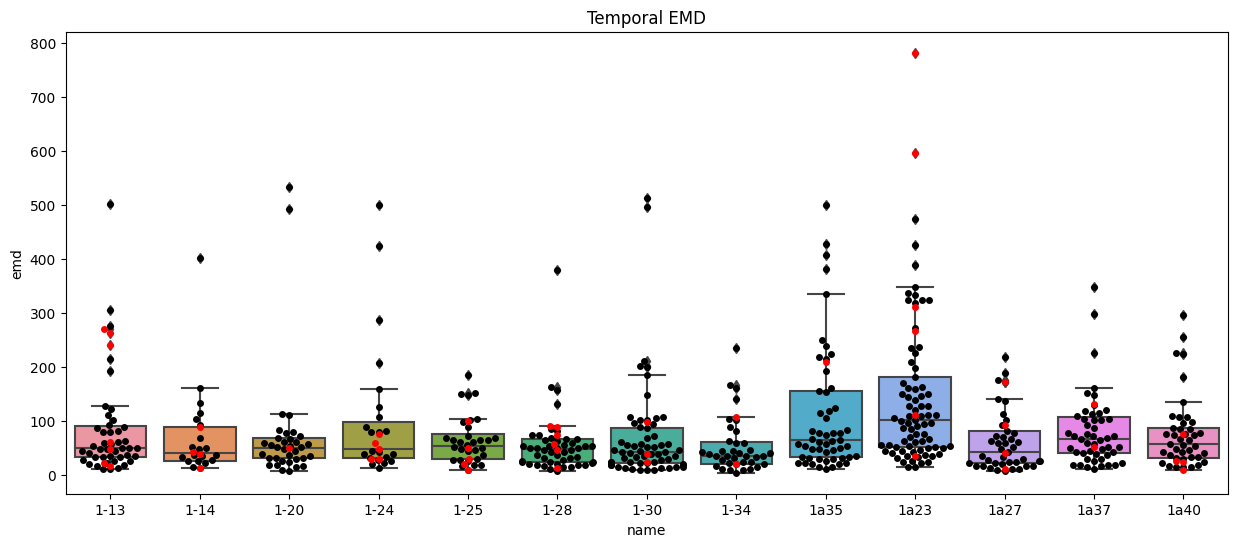

In [12]:
significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
non_significant_mask = ~significant_mask
fig = plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="name", y="emd", data=df)
sns.swarmplot(x="name", y="emd", data=df[non_significant_mask], color="black", ax=ax)
sns.swarmplot(x="name", y="emd", data=df[significant_mask], color="red", ax=ax)
plt.title('Temporal EMD')
plt.show()


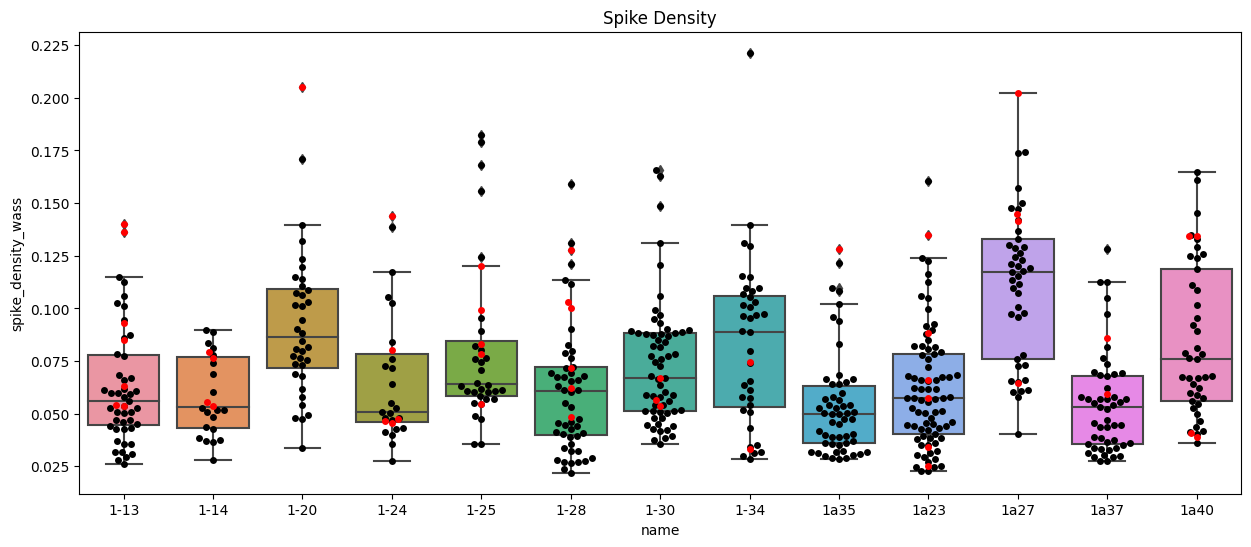

In [13]:
significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
non_significant_mask = ~significant_mask
fig = plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="name", y="spike_density_wass", data=df)
sns.swarmplot(x="name", y="spike_density_wass", data=df[non_significant_mask], color="black", ax=ax)
sns.swarmplot(x="name", y="spike_density_wass", data=df[significant_mask], color="red", ax=ax)
plt.title('Spike Density')
plt.show()


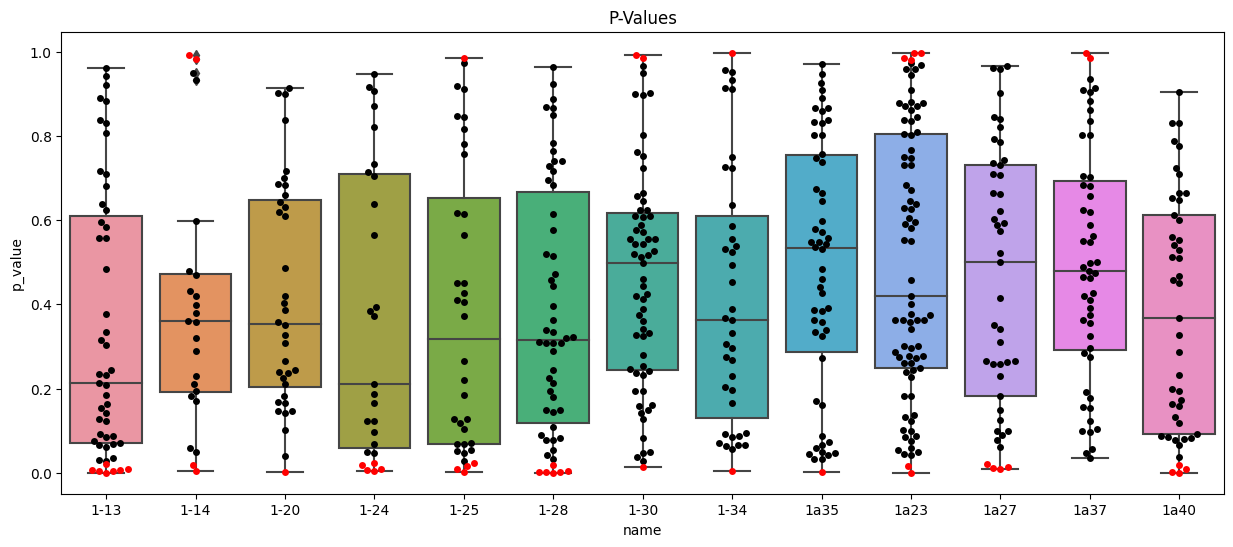

In [14]:
significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
non_significant_mask = ~significant_mask
fig = plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="name", y="p_value", data=df)
sns.swarmplot(x="name", y="p_value", data=df[non_significant_mask], color="black", ax=ax)
sns.swarmplot(x="name", y="p_value", data=df[significant_mask], color="red", ax=ax)
plt.title('P-Values')
plt.show()

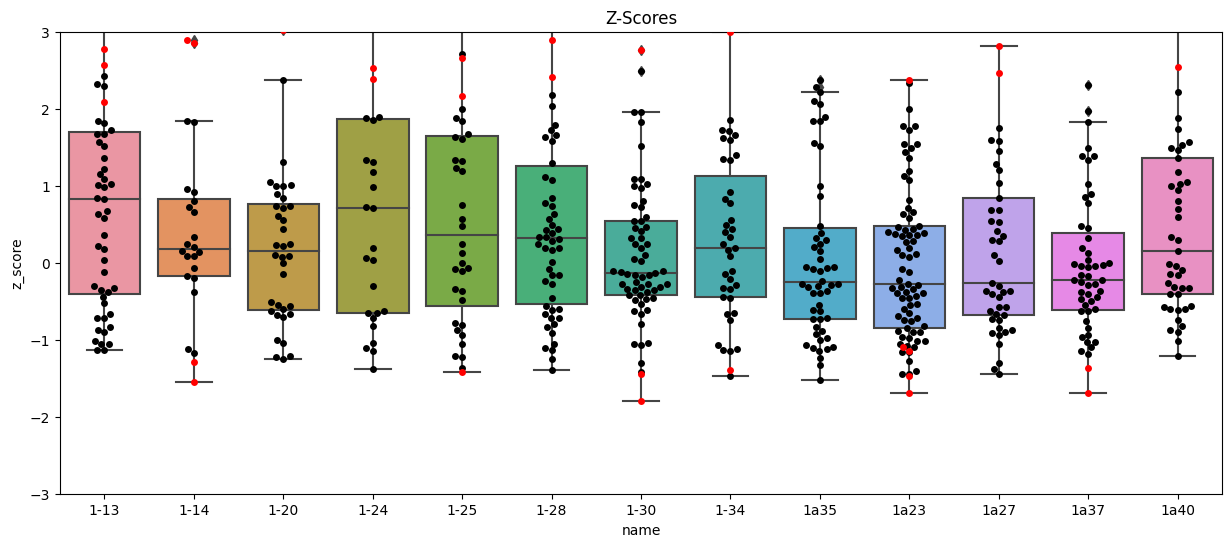

In [15]:
significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
non_significant_mask = ~significant_mask
fig = plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="name", y="z_score", data=df)
sns.swarmplot(x="name", y="z_score", data=df[non_significant_mask], color="black", ax=ax)
sns.swarmplot(x="name", y="z_score", data=df[significant_mask], color="red", ax=ax)
plt.title('Z-Scores')
plt.ylim(-3, 3)
plt.show()

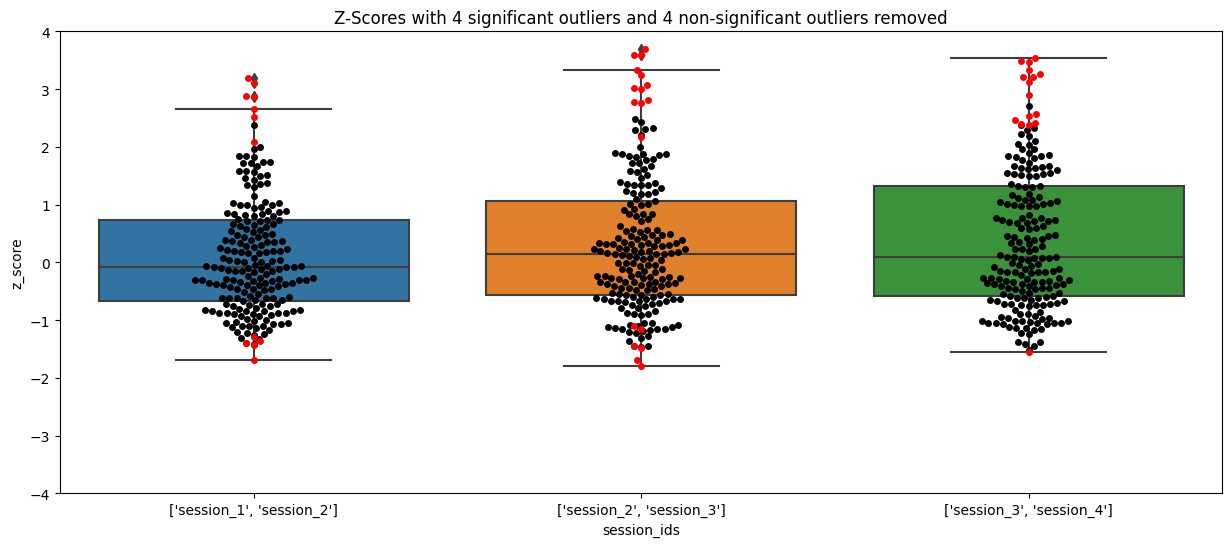

In [16]:
# split boxplots by session pairs instead
sig_outlier_count = len(df[(df['z_score'] > 4) | (df['z_score'] < -4) & significant_mask])
nsig_outlier_count = len(df[(df['z_score'] > 4) | (df['z_score'] < -4) & non_significant_mask])
significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
non_significant_mask = ~significant_mask
fig = plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="session_ids", y="z_score", data=df)
sns.swarmplot(x="session_ids", y="z_score", data=df[non_significant_mask], color="black", ax=ax)
sns.swarmplot(x="session_ids", y="z_score", data=df[significant_mask], color="red", ax=ax)
plt.ylim(-4, 4)
plt.title('Z-Scores with {} significant outliers and {} non-significant outliers removed'.format(sig_outlier_count, nsig_outlier_count))
plt.show()


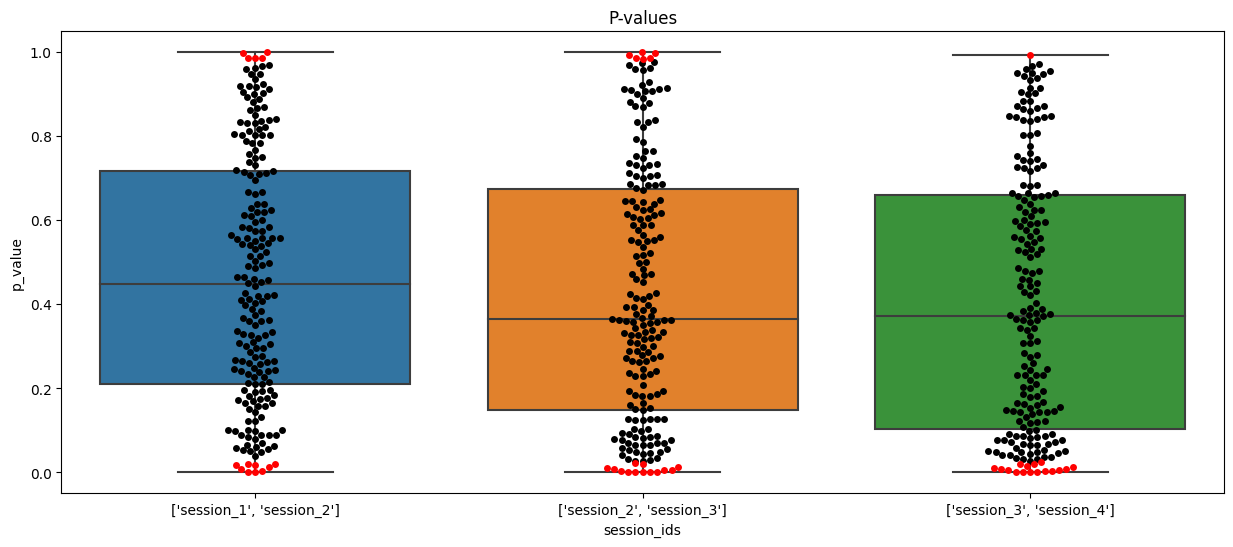

In [17]:
# split boxplots by session pairs instead
significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
non_significant_mask = ~significant_mask
fig = plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="session_ids", y="p_value", data=df)
sns.swarmplot(x="session_ids", y="p_value", data=df[non_significant_mask], color="black", ax=ax)
sns.swarmplot(x="session_ids", y="p_value", data=df[significant_mask], color="red", ax=ax)
plt.title('P-values')
plt.show()


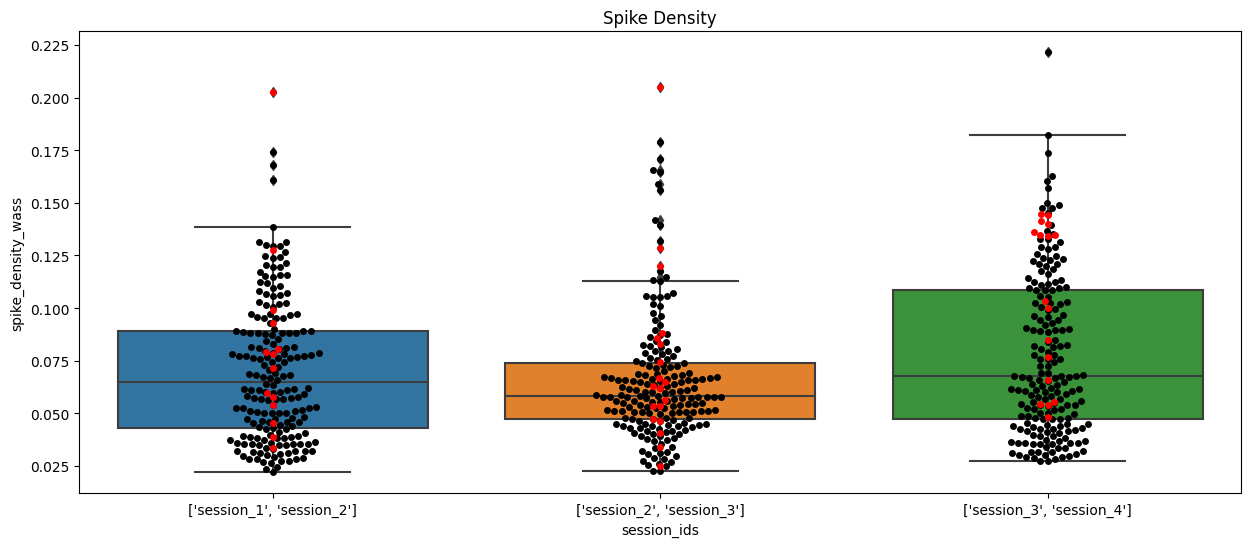

In [18]:
# split boxplots by session pairs instead
significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
non_significant_mask = ~significant_mask
fig = plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="session_ids", y="spike_density_wass", data=df)
sns.swarmplot(x="session_ids", y="spike_density_wass", data=df[non_significant_mask], color="black", ax=ax)
sns.swarmplot(x="session_ids", y="spike_density_wass", data=df[significant_mask], color="red", ax=ax)
plt.title('Spike Density')
plt.show()

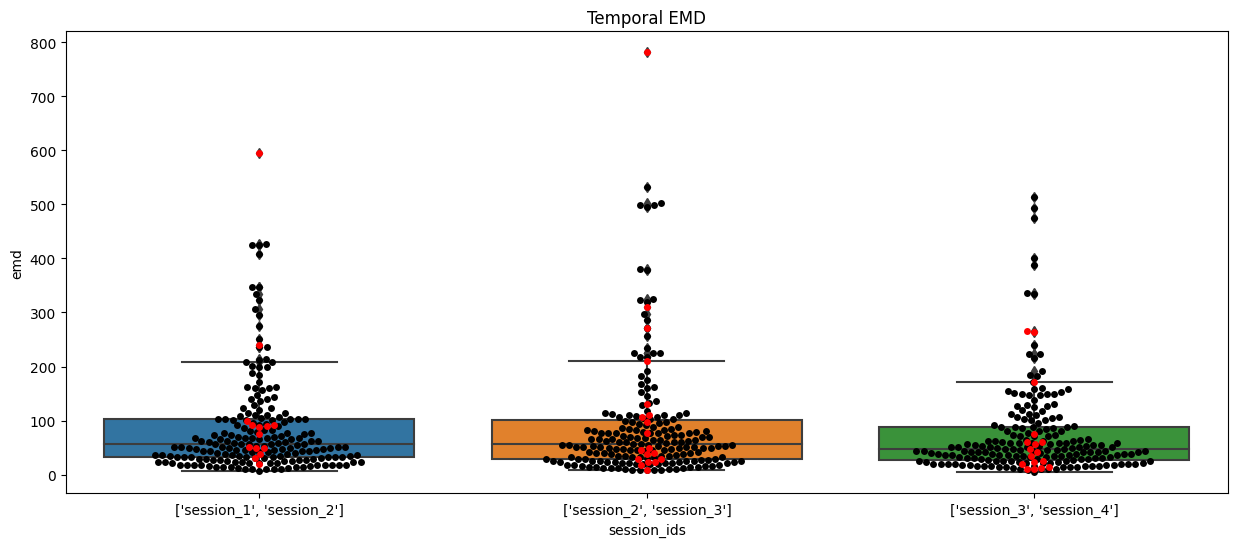

In [19]:
# split boxplots by session pairs instead
significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
non_significant_mask = ~significant_mask
fig = plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="session_ids", y="emd", data=df)
sns.swarmplot(x="session_ids", y="emd", data=df[non_significant_mask], color="black", ax=ax)
sns.swarmplot(x="session_ids", y="emd", data=df[significant_mask], color="red", ax=ax)
plt.title('Temporal EMD')
plt.show()

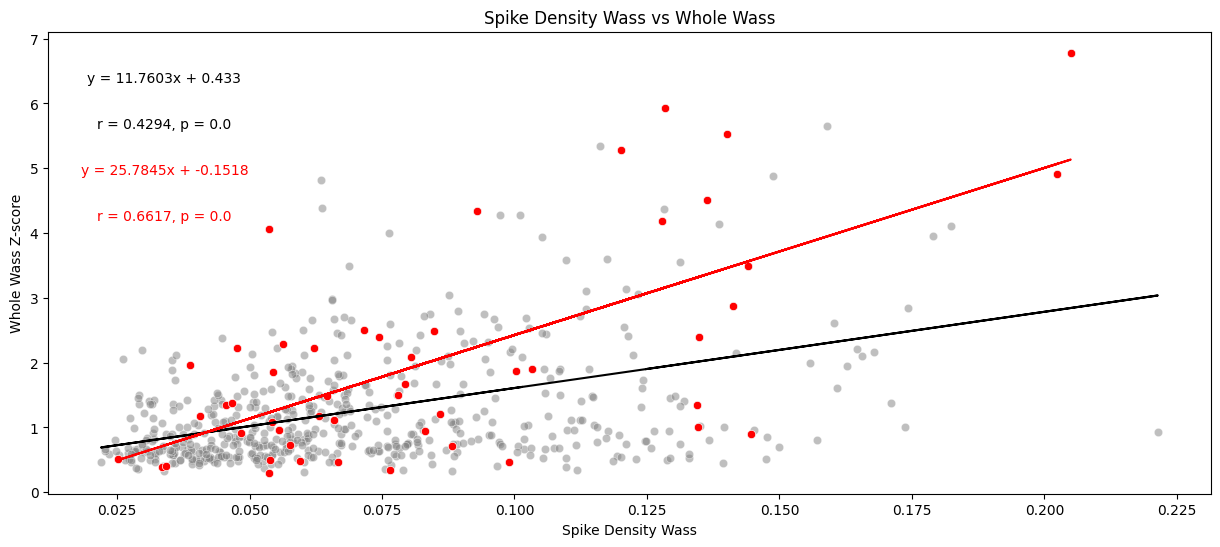

In [20]:
# plot spike density against whole wass
fig = plt.figure(figsize=(15, 6))
ax = sns.scatterplot(x="spike_density_wass", y="whole_wass", data=df, color='grey', alpha=0.5)
# add line of best fit
significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
x = df['spike_density_wass']
xsig = df[significant_mask]['spike_density_wass']
y = df['whole_wass']
ysig = df[significant_mask]['whole_wass']
m, b = np.polyfit(x, y, 1)
msig, bsig = np.polyfit(xsig, ysig, 1)
plt.plot(x, m*x + b, color='k')
plt.plot(xsig, msig*xsig + bsig, color='r')
# label sig poinnts in red
significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
sig_df = df[significant_mask]
sns.scatterplot(x="spike_density_wass", y="whole_wass", data=sig_df, color='red')
# add gradient and intercept and correlation coefficient
gradient = round(m, 4)
intercept = round(b, 4)
gradientsig = round(msig, 4)
interceptsig = round(bsig, 4)
r, p = pearsonr(x, y)
rsig, psig = pearsonr(xsig, ysig)
r = round(r, 4)
p = round(p, 4)
rsig = round(rsig, 4)
psig = round(psig, 4)
plt.text(0.1, 0.9, 'y = ' + str(gradient) + 'x + ' + str(intercept), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.text(0.1, 0.8, 'r = ' + str(r) + ', p = ' + str(p), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.text(0.1, 0.7, 'y = ' + str(gradientsig) + 'x + ' + str(interceptsig), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='r')
plt.text(0.1, 0.6, 'r = ' + str(rsig) + ', p = ' + str(psig), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='r')

plt.xlabel('Spike Density Wass')
plt.ylabel('Whole Wass Z-score')
plt.title('Spike Density Wass vs Whole Wass')
# plt.ylim(-4,4)
plt.show()

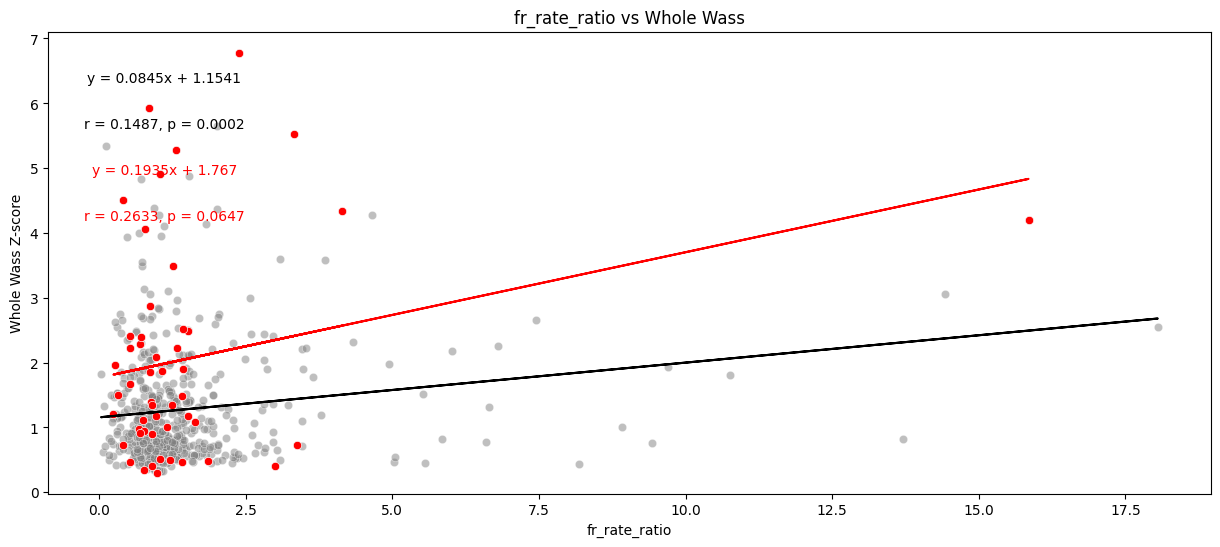

In [21]:
# plot spike density against whole wass
fig = plt.figure(figsize=(15, 6))
ax = sns.scatterplot(x="fr_rate_ratio", y="whole_wass", data=df, color='grey', alpha=0.5)
# add line of best fit
significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
x = df['fr_rate_ratio']
xsig = df[significant_mask]['fr_rate_ratio']
y = df['whole_wass']
ysig = df[significant_mask]['whole_wass']
m, b = np.polyfit(x, y, 1)
msig, bsig = np.polyfit(xsig, ysig, 1)
plt.plot(x, m*x + b, color='k')
plt.plot(xsig, msig*xsig + bsig, color='r')
# label sig poinnts in red
significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
sig_df = df[significant_mask]
sns.scatterplot(x="fr_rate_ratio", y="whole_wass", data=sig_df, color='red')
# add gradient and intercept and correlation coefficient
gradient = round(m, 4)
intercept = round(b, 4)
gradientsig = round(msig, 4)
interceptsig = round(bsig, 4)
r, p = pearsonr(x, y)
rsig, psig = pearsonr(xsig, ysig)
r = round(r, 4)
p = round(p, 4)
rsig = round(rsig, 4)
psig = round(psig, 4)
plt.text(0.1, 0.9, 'y = ' + str(gradient) + 'x + ' + str(intercept), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.text(0.1, 0.8, 'r = ' + str(r) + ', p = ' + str(p), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.text(0.1, 0.7, 'y = ' + str(gradientsig) + 'x + ' + str(interceptsig), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='r')
plt.text(0.1, 0.6, 'r = ' + str(rsig) + ', p = ' + str(psig), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='r')

plt.xlabel('fr_rate_ratio')
plt.ylabel('Whole Wass Z-score')
plt.title('fr_rate_ratio vs Whole Wass')
# plt.ylim(-4,4)
plt.show()

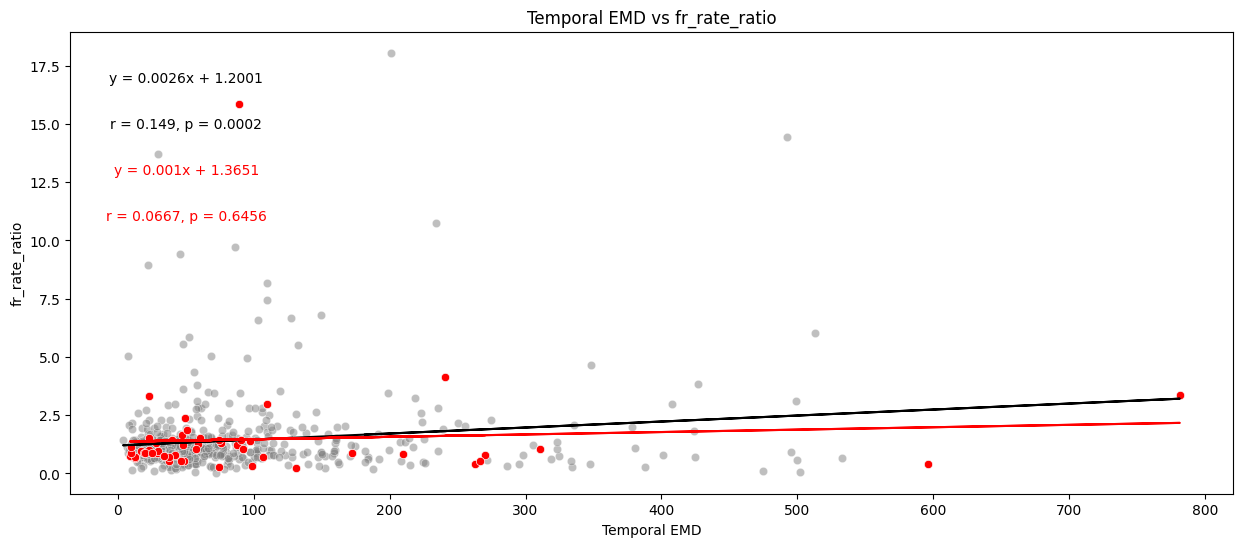

In [22]:
# plot spike density against whole wass
fig = plt.figure(figsize=(15, 6))
ax = sns.scatterplot(x="emd", y="fr_rate_ratio", data=df, color='grey', alpha=0.5)
# add line of best fit
significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
x = df['emd']
xsig = df[significant_mask]['emd']
y = df['fr_rate_ratio']
ysig = df[significant_mask]['fr_rate_ratio']
m, b = np.polyfit(x, y, 1)
msig, bsig = np.polyfit(xsig, ysig, 1)
plt.plot(x, m*x + b, color='k')
plt.plot(xsig, msig*xsig + bsig, color='r')
# label sig poinnts in red
significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
sig_df = df[significant_mask]
sns.scatterplot(x="emd", y="fr_rate_ratio", data=sig_df, color='red')
# add gradient and intercept and correlation coefficient
gradient = round(m, 4)
intercept = round(b, 4)
gradientsig = round(msig, 4)
interceptsig = round(bsig, 4)
r, p = pearsonr(x, y)
rsig, psig = pearsonr(xsig, ysig)
r = round(r, 4)
p = round(p, 4)
rsig = round(rsig, 4)
psig = round(psig, 4)
plt.text(0.1, 0.9, 'y = ' + str(gradient) + 'x + ' + str(intercept), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.text(0.1, 0.8, 'r = ' + str(r) + ', p = ' + str(p), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.text(0.1, 0.7, 'y = ' + str(gradientsig) + 'x + ' + str(interceptsig), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='red')
plt.text(0.1, 0.6, 'r = ' + str(rsig) + ', p = ' + str(psig), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='red')

plt.xlabel('Temporal EMD')
plt.ylabel('fr_rate_ratio')
plt.title('Temporal EMD vs fr_rate_ratio')
# plt.ylim(-4,4)
plt.show()

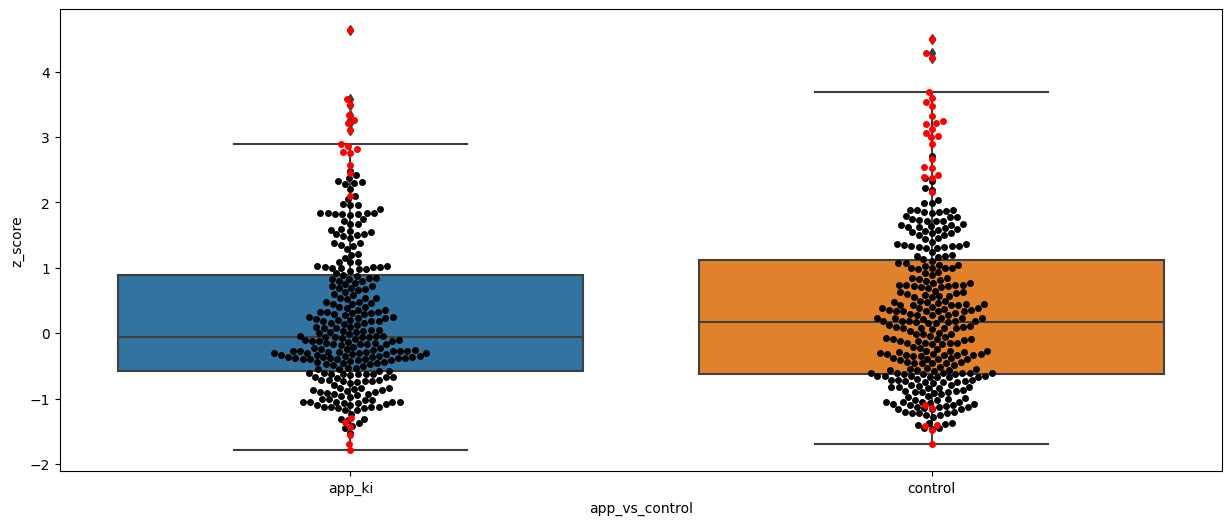

t = -1.1630669969746024
p = 0.2452621162594965
u = 43676.0
p = 0.32566761033548797


In [23]:
# compare AD vs nonn AD groups 
from scipy.stats import ttest_ind
app_ki = ['1-13', '1-14', '1a27', '1-30', '1a35', '1a37']
control = ['1-20', '1-24', '1-25', '1-28', '1-34', '1a23', '1a40']

# add app vs control column to df
df['app_vs_control'] = np.where(df['name'].isin(app_ki), 'app_ki', 'control')

significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
non_significant_mask = ~significant_mask
sig_outlier_count = len(df[(df['z_score'] > 4) | (df['z_score'] < -4) & significant_mask])
nsig_outlier_count = len(df[(df['z_score'] > 4) | (df['z_score'] < -4) & non_significant_mask])

# boxplot app vs control
fig = plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="app_vs_control", y="z_score", data=df)
sns.swarmplot(x="app_vs_control", y="z_score", data=df[non_significant_mask], color="black", ax=ax)
sns.swarmplot(x="app_vs_control", y="z_score", data=df[significant_mask], color="red", ax=ax)
# plt.ylim(-4, 4)
# plt.title('Z-Scores with {} significant outliers and {} non-significant outliers removed'.format(sig_outlier_count, nsig_outlier_count))
plt.show()

# significance test
app_ki_df = df[df['app_vs_control'] == 'app_ki']    
control_df = df[df['app_vs_control'] == 'control']
app_ki_z_scores = app_ki_df['z_score']
control_z_scores = control_df['z_score']
t, p = ttest_ind(app_ki_z_scores, control_z_scores, equal_var=False)
print('t = ' + str(t))
print('p = ' + str(p))
# try non parametric test
u, p = mannwhitneyu(app_ki_z_scores, control_z_scores)
print('u = ' + str(u))
print('p = ' + str(p))


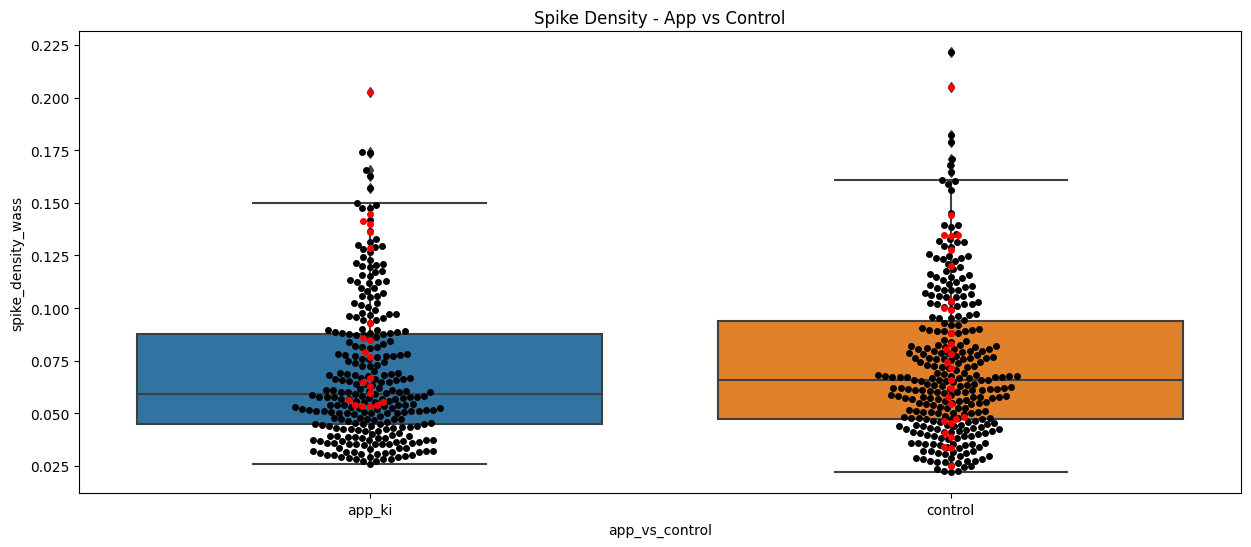

t = -1.4472288868845427
p = 0.1483528743839616
u = 42271.0
p = 0.10191250911157783


In [24]:
# boxplot of spike_density_wass across session_ids for app vs control
fig = plt.figure(figsize=(15, 6))
df['app_vs_control'] = np.where(df['name'].isin(app_ki), 'app_ki', 'control')
ax = sns.boxplot(x="app_vs_control", y="spike_density_wass", data=df)
sns.swarmplot(x="app_vs_control", y="spike_density_wass", data=df[non_significant_mask], color="black", ax=ax)
sns.swarmplot(x="app_vs_control", y="spike_density_wass", data=df[significant_mask], color="red", ax=ax)
plt.title('Spike Density - App vs Control')
plt.show()

# significance test
app_ki_df = df[df['app_vs_control'] == 'app_ki']
control_df = df[df['app_vs_control'] == 'control']
app_ki_spike_density = app_ki_df['spike_density_wass']
control_spike_density = control_df['spike_density_wass']
t, p = ttest_ind(app_ki_spike_density, control_spike_density, equal_var=False)
print('t = ' + str(t))
print('p = ' + str(p))
# try non parametric test
u, p = mannwhitneyu(app_ki_spike_density, control_spike_density)
print('u = ' + str(u))
print('p = ' + str(p))


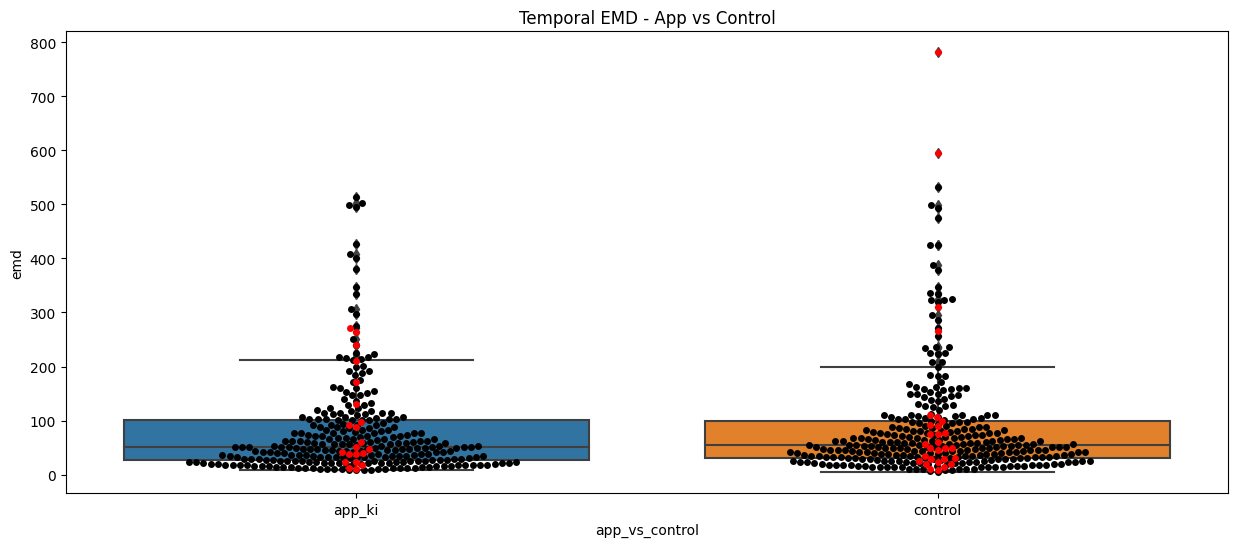

t = -0.7846353767467132
p = 0.43297525864760866
u = 43865.0
p = 0.370751337783514


In [25]:
# boxplot of spike_density_wass across session_ids for app vs control
fig = plt.figure(figsize=(15, 6))
df['app_vs_control'] = np.where(df['name'].isin(app_ki), 'app_ki', 'control')
ax = sns.boxplot(x="app_vs_control", y="emd", data=df)
sns.swarmplot(x="app_vs_control", y="emd", data=df[non_significant_mask], color="black", ax=ax)
sns.swarmplot(x="app_vs_control", y="emd", data=df[significant_mask], color="red", ax=ax)
plt.title('Temporal EMD - App vs Control')
plt.show()

# significance test
app_ki_df = df[df['app_vs_control'] == 'app_ki']
control_df = df[df['app_vs_control'] == 'control']
app_ki_spike_density = app_ki_df['emd']
control_spike_density = control_df['emd']
t, p = ttest_ind(app_ki_spike_density, control_spike_density, equal_var=False)
print('t = ' + str(t))
print('p = ' + str(p))
# try non parametric test
u, p = mannwhitneyu(app_ki_spike_density, control_spike_density)
print('u = ' + str(u))
print('p = ' + str(p))


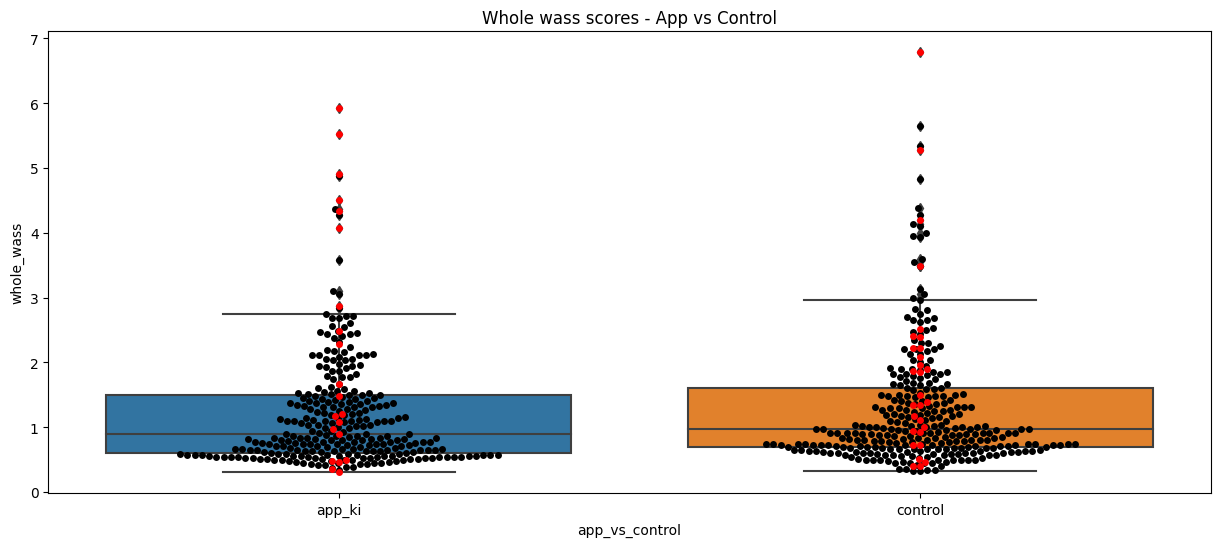

t = -1.0460251691373574
p = 0.2959682445980307


In [26]:
# boxplot of spike_density_wass across session_ids for app vs control
fig = plt.figure(figsize=(15, 6))
df['app_vs_control'] = np.where(df['name'].isin(app_ki), 'app_ki', 'control')
# p-values two sided
ax = sns.boxplot(x="app_vs_control", y="whole_wass", data=df)
sns.swarmplot(x="app_vs_control", y="whole_wass", data=df[non_significant_mask], color="black", ax=ax)
sns.swarmplot(x="app_vs_control", y="whole_wass", data=df[significant_mask], color="red", ax=ax)
plt.title('Whole wass scores - App vs Control')
plt.show()

# significance test
app_ki_df = df[df['app_vs_control'] == 'app_ki']
control_df = df[df['app_vs_control'] == 'control']
app_ki_spike_density = app_ki_df['whole_wass']
control_spike_density = control_df['whole_wass']
t, p = ttest_ind(app_ki_spike_density, control_spike_density, equal_var=False)
print('t = ' + str(t))
print('p = ' + str(p))


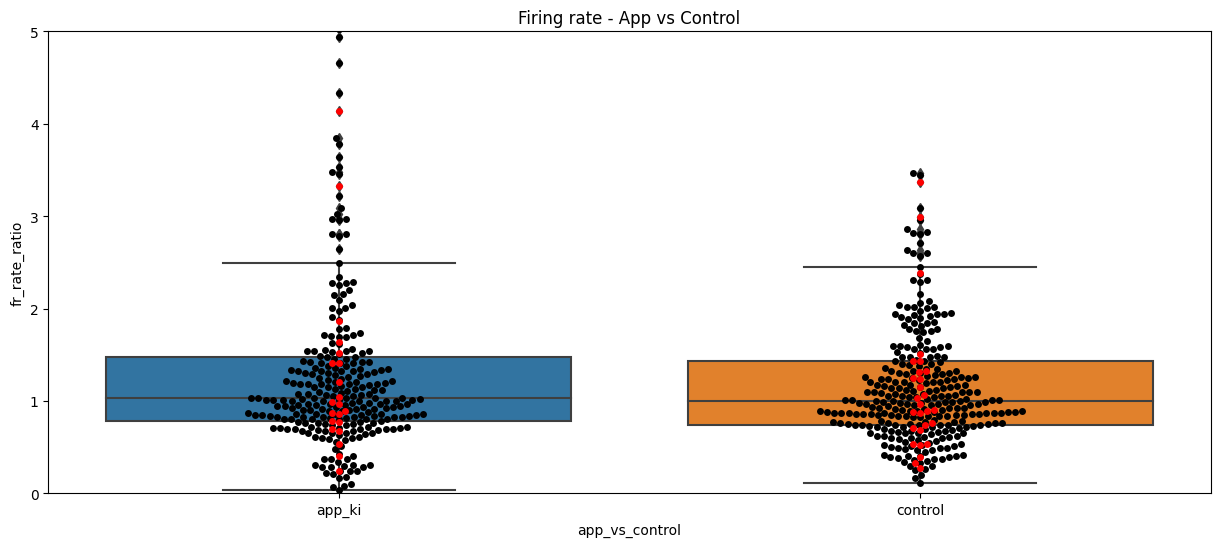

t = 0.8594706111875248
p = 0.3904264375343903
t = 47867.0
p = 0.33513174998812423


In [27]:
# boxplot of spike_density_wass across session_ids for app vs control
fig = plt.figure(figsize=(15, 6))
df['app_vs_control'] = np.where(df['name'].isin(app_ki), 'app_ki', 'control')
ax = sns.boxplot(x="app_vs_control", y="fr_rate_ratio", data=df)
sns.swarmplot(x="app_vs_control", y="fr_rate_ratio", data=df[non_significant_mask], color="black", ax=ax)
sns.swarmplot(x="app_vs_control", y="fr_rate_ratio", data=df[significant_mask], color="red", ax=ax)
plt.title('Firing rate - App vs Control')
plt.ylim(0, 5)
plt.show()

# significance test
app_ki_df = df[df['app_vs_control'] == 'app_ki']
control_df = df[df['app_vs_control'] == 'control']
app_ki_spike_density = app_ki_df['fr_rate_ratio']
control_spike_density = control_df['fr_rate_ratio']
t, p = ttest_ind(app_ki_spike_density, control_spike_density, equal_var=False)
print('t = ' + str(t))
print('p = ' + str(p))
t, p = mannwhitneyu(app_ki_spike_density, control_spike_density)
print('t = ' + str(t))
print('p = ' + str(p))

C:\Users\aaoun\AppData\Local\Temp\ipykernel_16436\1481416110.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sig_outlier_count = len(df_to_use[(df['z_score'] > 4) | (df_to_use['z_score'] < -4) & significant_mask])
C:\Users\aaoun\AppData\Local\Temp\ipykernel_16436\1481416110.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nsig_outlier_count = len(df_to_use[(df['z_score'] > 4) | (df_to_use['z_score'] < -4) & non_significant_mask])


comparing ['session_1', 'session_2'] to ['session_2', 'session_3']
t = 4570.0
p = 0.9224064211935075
comparing ['session_1', 'session_2'] to ['session_3', 'session_4']
t = 4324.0
p = 0.46150791708337635
comparing ['session_2', 'session_3'] to ['session_1', 'session_2']
t = 4646.0
p = 0.9224064211935075
comparing ['session_2', 'session_3'] to ['session_3', 'session_4']
t = 4389.0
p = 0.5703511741170512
comparing ['session_3', 'session_4'] to ['session_1', 'session_2']
t = 4892.0
p = 0.46150791708337635
comparing ['session_3', 'session_4'] to ['session_2', 'session_3']
t = 4827.0
p = 0.5703511741170512


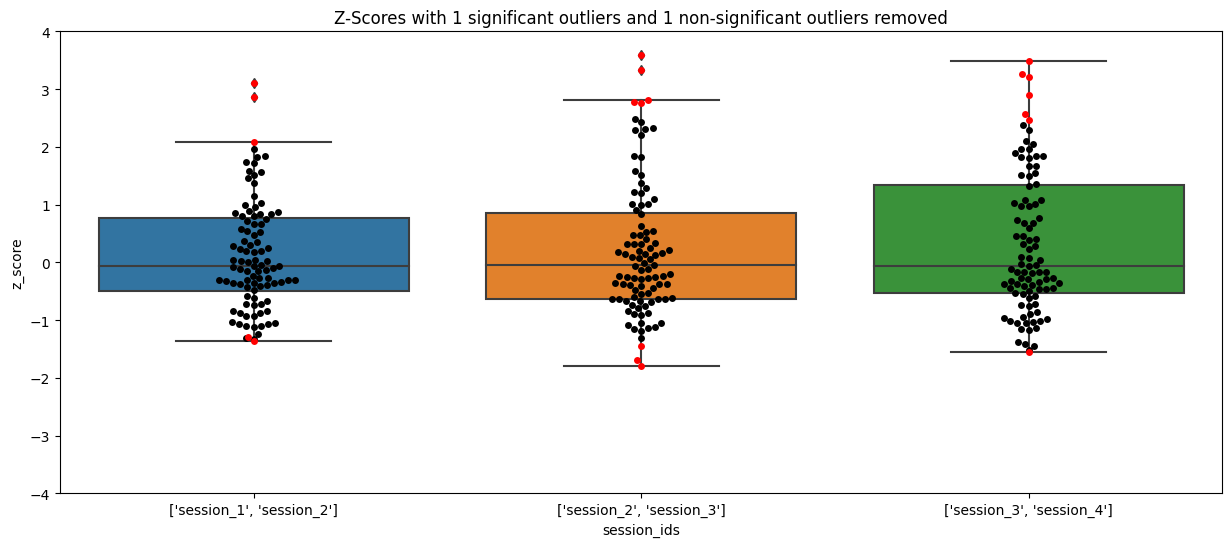

In [28]:
df_to_use = df[df['name'].isin(app_ki)]

significant_mask = (df_to_use['p_value'] >= 0.975) | (df_to_use['p_value'] <= 0.025)
non_significant_mask = ~significant_mask
sig_outlier_count = len(df_to_use[(df['z_score'] > 4) | (df_to_use['z_score'] < -4) & significant_mask])
nsig_outlier_count = len(df_to_use[(df['z_score'] > 4) | (df_to_use['z_score'] < -4) & non_significant_mask])
fig = plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="session_ids", y="z_score", data=df_to_use)
sns.swarmplot(x="session_ids", y="z_score", data=df_to_use[non_significant_mask], color="black", ax=ax)
sns.swarmplot(x="session_ids", y="z_score", data=df_to_use[significant_mask], color="red", ax=ax)
plt.ylim(-4, 4)

# significance test between session pairs 
session_ids = df_to_use['session_ids'].unique()
for session_id in session_ids:
    for session_id2 in session_ids:
        if session_id != session_id2:
            print('comparing {} to {}'.format(session_id, session_id2))
            session_df1 = df_to_use[df_to_use['session_ids'] == session_id]
            z_scores1 = session_df1['z_score']

            session_df2 = df_to_use[df_to_use['session_ids'] == session_id2]
            z_scores2 = session_df2['z_score']

            # paired t-test
            # t, p = ttest_rel(z_scores1, z_scores2)
            # print('t = ' + str(t))
            # print('p = ' + str(p))
            # try mann whitney u test
            t, p = mannwhitneyu(z_scores1, z_scores2)
            print('t = ' + str(t))
            print('p = ' + str(p))

            # # add signficance to plot with * and line
            # if p < 0.05:
            #     plt.plot([session_id, session_id2], [2.5, 2.5], color='black', linewidth=1)
            #     plt.text((session_id+session_id2)/2, 2.6, '*', horizontalalignment='center', verticalalignment='center', fontsize=20)


plt.title('Z-Scores with {} significant outliers and {} non-significant outliers removed'.format(sig_outlier_count, nsig_outlier_count))
plt.show()

c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\Envs\envPRISM\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


['session_1', 'session_2']
t = -0.1846968614294577
p = 0.853656683775587
u = 5264.0
p = 0.6723017928490638
['session_2', 'session_3']
t = -1.1248590529675828
p = 0.26199816498267037
u = 4574.0
p = 0.21584940059673408
['session_3', 'session_4']
t = -0.66019559774462
p = 0.5099064284594352
u = 4759.0
p = 0.42850501922529194


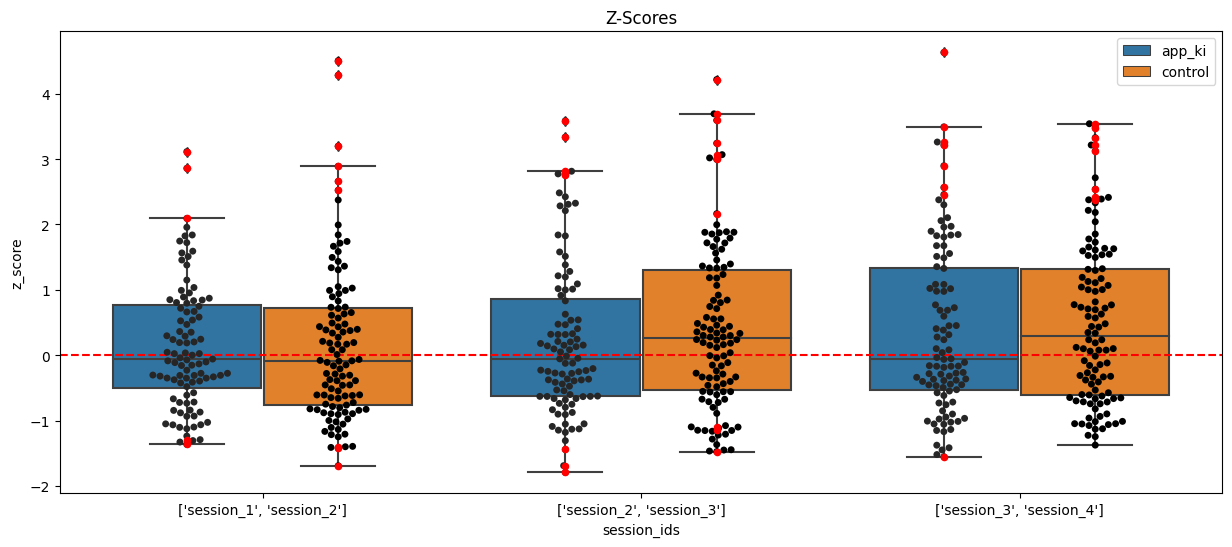

In [29]:
df['group'] = np.where(df['name'].isin(control), 'control', 'app_ki')
significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
non_significant_mask = ~significant_mask
# sig_outlier_count = len(df[(df['z_score'] > 4) | (df['z_score'] < -4) & significant_mask])
# nsig_outlier_count = len(df[(df['z_score'] > 4) | (df['z_score'] < -4) & non_significant_mask])

fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x="session_ids", y="z_score", hue="group", data=df, ax=ax)
sns.swarmplot(x="session_ids", y="z_score", hue="group", data=df, color='black', dodge=True, ax=ax)
sig_points = df[(df['p_value'] <= 0.025) | (df['p_value'] >= 0.975)]

unique_sessions = df['session_ids'].unique()
num_groups = len(df['group'].unique())
group_offsets = np.linspace(-0.2, 0.2, num_groups)

for i, session in enumerate(unique_sessions):
    session_data = df[df['session_ids'] == session]
    for j, group in enumerate(session_data['group'].unique()):
        group_data = session_data[session_data['group'] == group]
        sig_points = group_data[(group_data['p_value'] <= 0.025) | (group_data['p_value'] >= 0.975)]
        x = [i + group_offsets[j]] * len(sig_points)
        ax.scatter(x=x, y=sig_points['z_score'], color='red', s=20, zorder=10)
# sns.swarmplot(x="session_ids", y="z_score", hue="group", data=sig_points, color="red", dodge=True, ax=ax)
# ax.set_ylim(-4, 4)
plt.title('Z-Scores') 
# with {} significant outliers and {} non-significant outliers removed'.format(sig_outlier_count, nsig_outlier_count))
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title=None)
# add significance to boxplot
session_pairs = df['session_ids'].unique()
for i, session_pair in enumerate(session_pairs):
    app_ki_df = df[(df['session_ids'] == session_pair) & (df['name'].isin(app_ki))]
    control_df = df[(df['session_ids'] == session_pair) & (df['name'].isin(control))]
    app_ki_z_scores = app_ki_df['z_score']
    control_z_scores = control_df['z_score']
    # from statsmodels.stats.weightstats import ttest_ind
    # res = ttest_ind(app_ki_z_scores, control_z_scores, usevar='unequal')
    # from scipy.stats import ttest_ind
    res = ttest_ind(app_ki_z_scores, control_z_scores, equal_var=False)
    u, pu = mannwhitneyu(app_ki_z_scores, control_z_scores)
    print(session_pair)
    print('t = ' + str(res[0]))
    print('p = ' + str(res[1]))
    # print('t = ' + str(res2[0]))
    # print('p = ' + str(res2[1])) 
    print('u = ' + str(u))
    print('p = ' + str(pu))
    if p <= 0.05:
        x_pos = session_pairs.tolist().index(session_pair)
        y_pos = max(df[df['session_ids'] == session_pair]['z_score']) + 0.1  # Adjust the vertical position of the "*"
        significance = "*"
        ax.text(x_pos, y_pos, significance, ha='center', va='bottom', color='red')
        # ax.text(i, 2.5, '*', fontsize=20, horizontalalignment='center', verticalalignment='center')
# horizontal red line at 0
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


In [30]:
from statsmodels.stats.weightstats import ttest_ind
app_ki = ['1-13', '1-14', '1a27', '1-30', '1a35', '1a37']
control = ['1-20', '1-24', '1-25', '1-28', '1-34', '1a23', '1a40']

metric = 'z_score'
# average z_score by name
grouped_data = df.groupby(['name']).mean().reset_index()
# count number of data points per name
count_data = df.groupby(['name']).count().reset_index()

# split into control and app_ki
control_data = grouped_data[grouped_data['name'].isin(control)]
app_ki_data = grouped_data[grouped_data['name'].isin(app_ki)]
control_count_data = count_data[count_data['name'].isin(control)]
app_ki_count_data = count_data[count_data['name'].isin(app_ki)]
# normalize 

w1 = app_ki_count_data[metric].values
w2 = control_count_data[metric].values
w1 = w1 / np.mean(w1)
w2 = w2 / np.mean(w2)

# # weighted stats test 
# result = ttest_ind(app_ki_data[metric].values, control_data[metric].values,usevar='unequal', alternative='two-sided')
result = ttest_ind(app_ki_data[metric].values, control_data[metric].values,usevar='unequal', weights=(w1, w2), alternative='two-sided')
# weighted non parametric test
# t_statistic,_value = mannwhitneyu(app_ki_data['spike_density_wass'].values, control_data['spike_density_wass'].values, alternative='two-sided', weights1=app_ki_count_data['spike_density_wass'].values, weights2=control_count_data['spike_density_wass'].values)
values1 = app_ki_data[metric].values
values2 = control_data[metric].values
weights1 = app_ki_count_data[metric].values
weights2 = control_count_data[metric].values
weighted_values1 = np.repeat(values1, weights1)
weighted_values2 = np.repeat(values2, weights2)

# Perform the Mann-Whitney U test on the weighted values
# u_statistic, p_value = mannwhitneyu(weighted_values1, weighted_values2, alternative='two-sided')
# print("Weighted U-statistic:", u_statistic)
# print("Weighted p-value:", p_value)

# wilcoxon
# result = wilcoxon(app_ki_data['emd'].values, control_data['emd'].values)

# welch's t-test
# result = ttest_ind(app_ki_data['z_score'].values, control_data['z_score'].values, usevar='unequal', alternative='two-sided')

t_statistic = result[0]
p_value = result[1]

print("Weighted t-statistic:", t_statistic)
print("Weighted p-value:", p_value)



Weighted t-statistic: -0.7033389094662791
Weighted p-value: 0.49763860474481103


In [31]:
values1, values2

(array([ 0.79127574,  0.36528182,  0.08862822,  0.21593788,  0.10805705,
        -0.03829553]),
 array([0.17932582, 0.6877312 , 0.60008602, 0.54928313, 0.28063281,
        0.00396086, 0.5294326 ]))

In [32]:
from scipy.stats import ttest_ind

result_scipy_welch = ttest_ind(app_ki_data[metric].values, control_data[metric].values, equal_var=False)

from statsmodels.stats.weightstats import ttest_ind

result_no_weights = ttest_ind(app_ki_data[metric].values, control_data[metric].values,usevar='unequal', alternative='two-sided')

result_pooled = ttest_ind(app_ki_data[metric].values, control_data[metric].values,usevar='pooled', weights=(app_ki_count_data[metric].values, control_count_data[metric].values), alternative='two-sided')

result_uneequal = ttest_ind(app_ki_data[metric].values, control_data[metric].values,usevar='unequal', weights=(app_ki_count_data[metric].values, control_count_data[metric].values), alternative='two-sided')

print("Welch's t-statistic:", result_scipy_welch[0])
print("Welch's p-value:", result_scipy_welch[1])

print("No weights t-statistic:", result_no_weights[0])
print("No weights p-value:", result_no_weights[1])

print("Pooled t-statistic:", result_pooled[0])
print("Pooled p-value:", result_pooled[1])

print("Unequal t-statistic:", result_uneequal[0])
print("Unequal p-value:", result_uneequal[1])

Welch's t-statistic: -0.9704813422271117
Welch's p-value: 0.3547898996187844
No weights t-statistic: -0.9704813422271117
No weights p-value: 0.35478989961878404
Pooled t-statistic: -5.265848809985584
Pooled p-value: 1.9428676730267812e-07
Unequal t-statistic: -5.238308110097644
Unequal p-value: 2.271245569118345e-07


In [33]:
print(app_ki_data['z_score'].values)
print(app_ki_count_data['z_score'].values)

from scipy.stats import ranksums

# Assuming you have two groups of data: group1 and group2

# Perform the Wilcoxon rank sum test with continuity correction
statistic, p_value = mannwhitneyu(app_ki_data['z_score'].values, control_data['z_score'].values, alternative='two-sided')

# Print the test statistic and p-value
print("Test Statistic:", statistic)
print("p-value:", p_value)


[ 0.79127574  0.36528182  0.08862822  0.21593788  0.10805705 -0.03829553]
[51 24 63 45 54 51]
Test Statistic: 14.0
p-value: 0.36596736596736595


In [34]:
df.to_excel('full_16_500.xlsx')

In [35]:
import pandas as pd

# Merge the dataframes on the 'name' column
merged_data = pd.merge(grouped_data, count_data, on='name', suffixes=('_mean', '_count'))

# drop all columns except name, z_score_mean, z_score_count, whole_wass_mean, whole_wass_count, spike_density_wass_mean, spike_density_wass_count
# fr_rate_ratio_mean, fr_rate_ratio_count, emd_mean, emd_count, group
merged_data = merged_data[['name', 'z_score_mean', 'z_score_count', 'whole_wass_mean', 'whole_wass_count', 'spike_density_wass_mean', 'spike_density_wass_count', 'fr_rate_ratio_mean', 'fr_rate_ratio_count', 'emd_mean', 'emd_count']]
# save to excel
merged_data.to_excel('check_align.xlsx', index=False)


In [36]:
merged_data['group_mean']

KeyError: 'group_mean'

In [ ]:
print(app_ki_data[metric].values, control_data[metric].values)
print(app_ki_count_data[metric].values, control_count_data[metric].values)

[0.7381649  0.50818134 0.09317024 0.35232169 0.14309629 0.07249228] [0.20932175 0.4034282  0.58798039 0.46838011 0.57633827 0.02659376
 0.42764485]
[51 24 63 45 54 51] [36 27 36 54 39 81 45]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


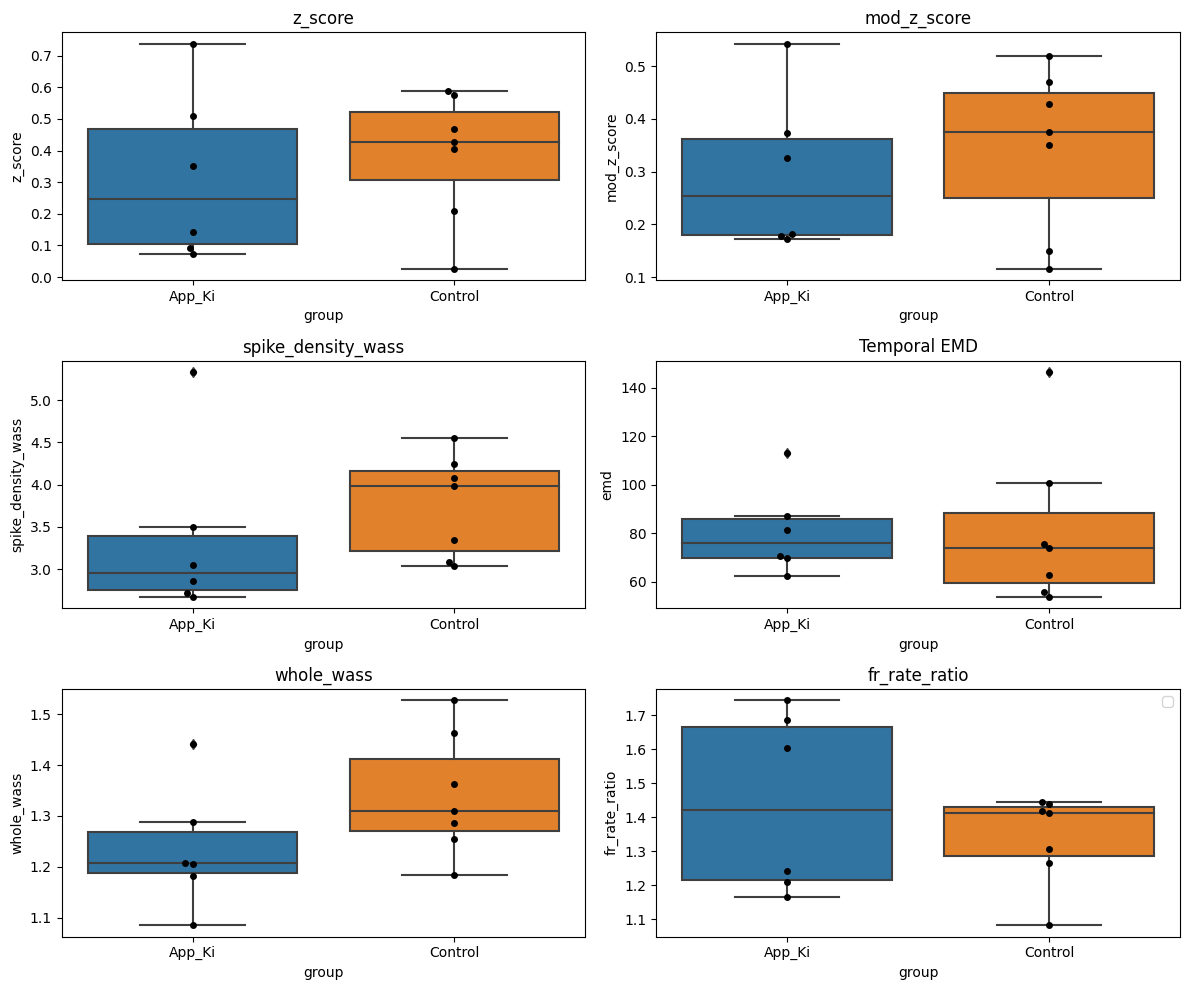

In [ ]:
# plot distribution of z_scores for ap_ki vs control
fig, ax = plt.subplots(figsize=(12, 10))
keys = ['z_score', 'mod_z_score', 'spike_density_wass', 'emd', 'whole_wass', 'fr_rate_ratio']
ct = 1
app_ki_data = df[df['name'].isin(app_ki)]
control_data = df[df['name'].isin(control)]
for key in keys:
    ax = plt.subplot(3,2, ct)

    grouped_data = df.groupby(['name']).mean().reset_index()

    # split into control and app_ki
    control_data = grouped_data[grouped_data['name'].isin(control)]
    app_ki_data = grouped_data[grouped_data['name'].isin(app_ki)]

    # create a new dataframe for boxplot
    boxplot_data = pd.DataFrame({
        'group': ['App_Ki'] * len(app_ki_data) + ['Control'] * len(control_data),
        key: np.concatenate([app_ki_data[key], control_data[key]])
    })

    sns.boxplot(x='group', y=key, data=boxplot_data)
    sns.swarmplot(x='group', y=key, data=boxplot_data, color='black', dodge=True)
    
    ct += 1
    if key != 'emd':
        ax.set_title(str(key))
    else:
        ax.set_title('Temporal EMD')

fig.tight_layout()
plt.legend()
plt.show()

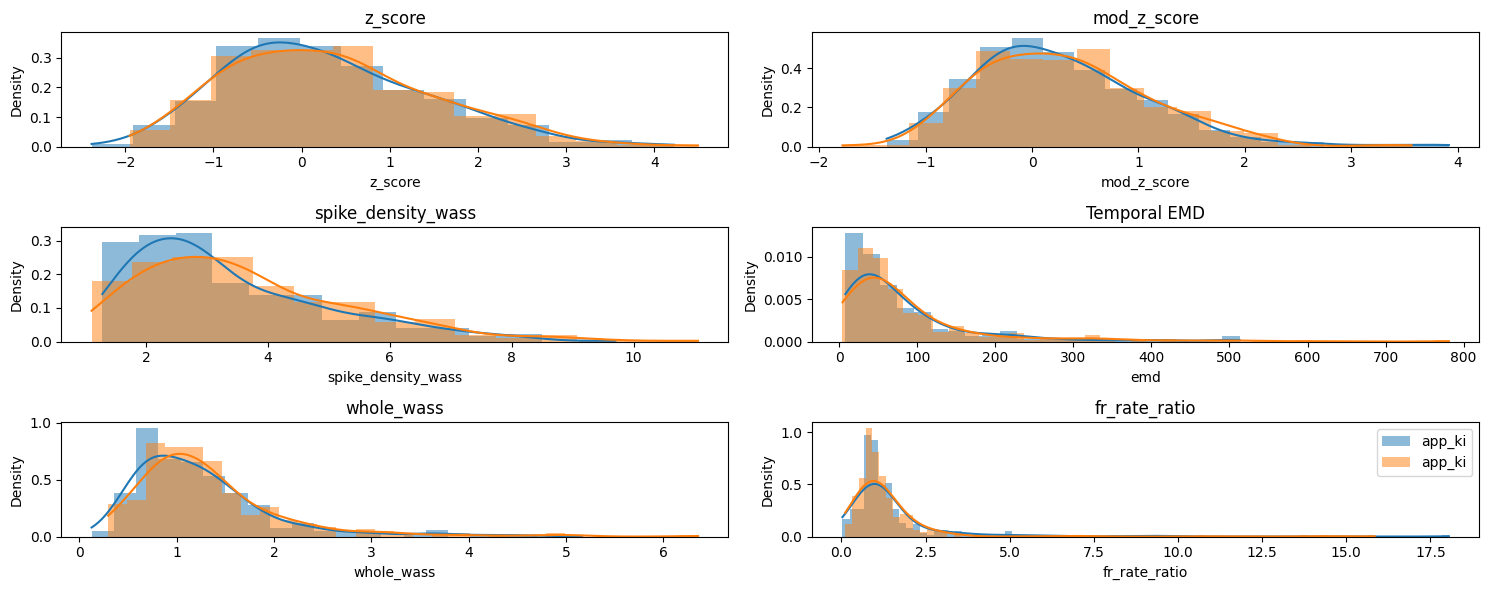

In [ ]:
# plot distribution of z_scores for ap_ki vs control
fig, ax = plt.subplots(figsize=(15, 6))
keys = ['z_score', 'mod_z_score', 'spike_density_wass', 'emd', 'whole_wass', 'fr_rate_ratio']
ct = 1
app_ki_data = df[df['name'].isin(app_ki)]
control_data = df[df['name'].isin(control)]
for key in keys:
    ax = plt.subplot(3,2, ct)
    sns.histplot(app_ki_data[key], ax=ax, label='app_ki', kde=True, stat='density', linewidth=0)
    sns.histplot(control_data[key], ax=ax, label='app_ki', kde=True, stat='density', linewidth=0)
    ct += 1
    if key != 'emd':
        ax.set_title(str(key))
    else:
        ax.set_title('Temporal EMD')

fig.tight_layout()
plt.legend()
plt.show()

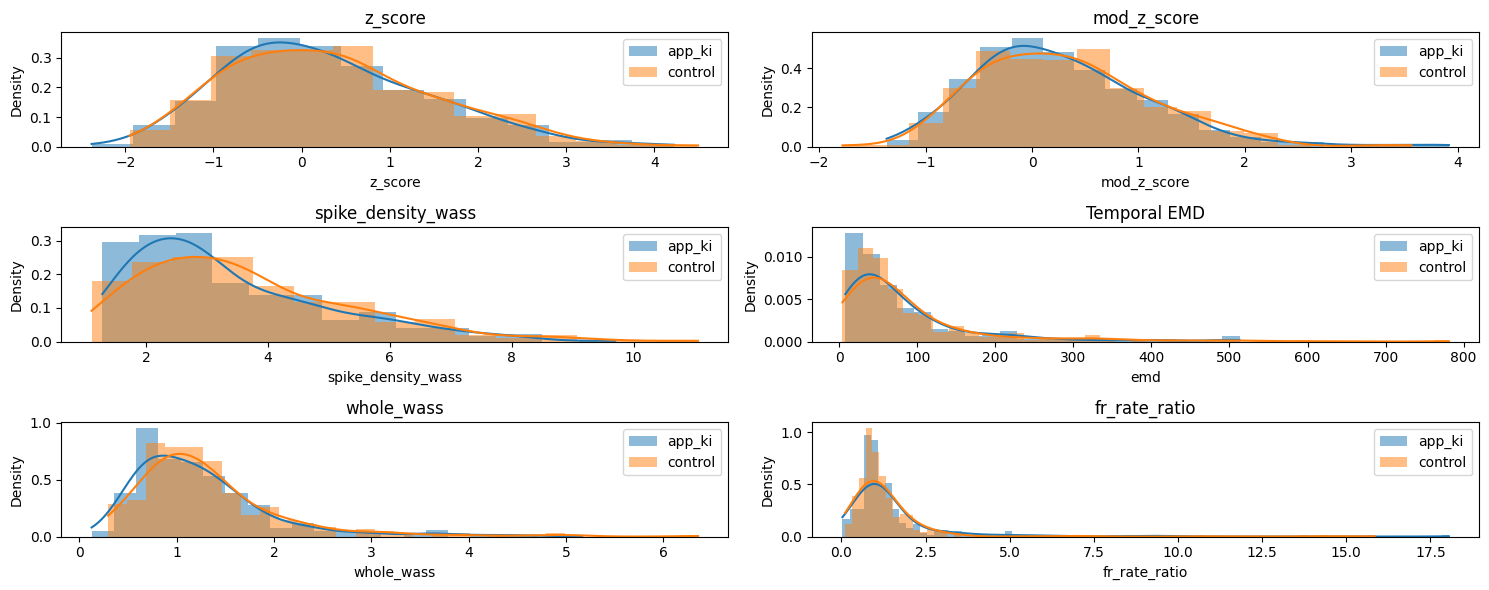

In [ ]:
# plot distribution of z_scores for ap_ki vs control
fig, ax = plt.subplots(figsize=(15, 6))
keys = ['z_score', 'mod_z_score', 'spike_density_wass', 'emd', 'whole_wass', 'fr_rate_ratio']
ct = 1
app_ki_data = df[df['name'].isin(app_ki)]
# & (df['session_ids'] == "['session_1', 'session_2']")
control_data = df[df['name'].isin(control)]
for key in keys:
    ax = plt.subplot(3,2, ct)
    sns.histplot(app_ki_data[key], ax=ax, label='app_ki', kde=True, stat='density', linewidth=0)
    sns.histplot(control_data[key], ax=ax, label='control', kde=True, stat='density', linewidth=0)
    ct += 1
    if key != 'emd':
        ax.set_title(str(key))
    else:
        ax.set_title('Temporal EMD')
    ax.legend()

fig.tight_layout()
plt.show()

In [ ]:
print(weights1, weights2)

[51 24 63 45 54 51] [36 27 36 54 39 81 45]


In [ ]:
# save df
df.to_csv('df.csv', index=False)

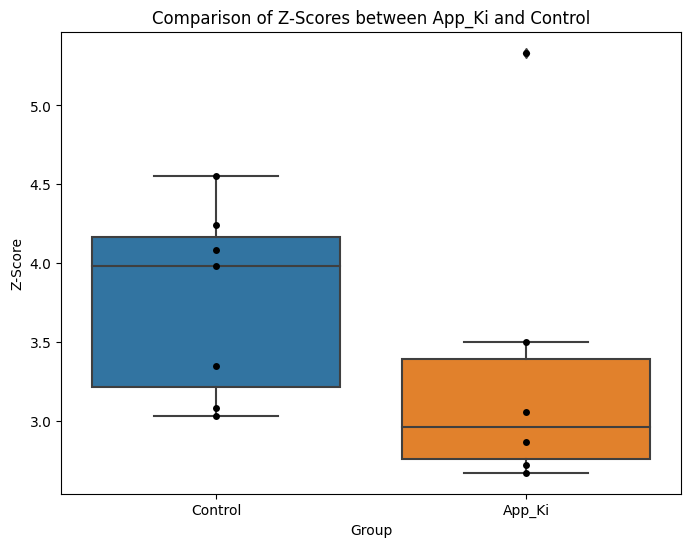

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# average z_score by name
grouped_data = df.groupby(['name']).mean().reset_index()

# split into control and app_ki
control_data = grouped_data[grouped_data['name'].isin(control)]
app_ki_data = grouped_data[grouped_data['name'].isin(app_ki)]

# create a new dataframe for boxplot
boxplot_data = pd.DataFrame({
    'group': ['Control'] * len(control_data) + ['App_Ki'] * len(app_ki_data),
    'spike_density_wass': np.concatenate([control_data['spike_density_wass'], app_ki_data['spike_density_wass']])
})

# plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='spike_density_wass', data=boxplot_data)
sns.swarmplot(x='group', y='spike_density_wass', data=boxplot_data, color='black', dodge=True)
plt.title('Comparison of Z-Scores between App_Ki and Control')
plt.xlabel('Group')
plt.ylabel('Z-Score')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

metric = 'spike_density_wass'

# Group the data by session_ids and name, and calculate the mean z_score
grouped_data = df.groupby(['session_ids', 'name']).mean().reset_index()
count_data = df.groupby(['session_ids', 'name']).count().reset_index()

# Create a new dataframe for boxplot
boxplot_data = pd.DataFrame(columns=['session_ids', 'group', 'z_score'])

for session_id in df['session_ids'].unique():
    session_data = grouped_data[grouped_data['session_ids'] == session_id]
    control_data = session_data[session_data['name'].isin(control)]
    app_ki_data = session_data[session_data['name'].isin(app_ki)]

    session_boxplot_data = pd.DataFrame({
        'session_ids': [session_id] * (len(app_ki_data) + len(control_data)),
        'group':['App_Ki'] * len(app_ki_data) + ['Control'] * len(control_data),
        metric: np.concatenate([app_ki_data[metric], control_data[metric]])
    })

    boxplot_data = boxplot_data.append(session_boxplot_data, ignore_index=True)

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='session_ids', y=metric, hue='group', data=boxplot_data)
plt.title('Comparison of ' + str(metric) + ' between App_Ki and Control for Each Session')
plt.xlabel('Session IDs')
plt.ylabel('metric')
plt.legend(title='Group')
plt.show()

# stats test for each session 
# from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ttest_ind
for unique_ses in df['session_ids'].unique():
    session_data = grouped_data[grouped_data['session_ids'] == unique_ses]
    control_data = session_data[session_data['name'].isin(control)]
    app_ki_data = session_data[session_data['name'].isin(app_ki)]
    session_count_data = count_data[count_data['session_ids'] == unique_ses]
    control_count_data = session_count_data[session_count_data['name'].isin(control)]
    app_ki_count_data = session_count_data[session_count_data['name'].isin(app_ki)]
    weights2 = app_ki_count_data[metric].values
    weights1 = control_count_data[metric].values
    weights1 = weights1 / np.mean(weights1)
    weights2 = weights2 / np.mean(weights2)
    
    res = ttest_ind(control_data[metric], app_ki_data[metric], usevar='unequal', weights=(weights1, weights2))
    t = res[0]
    p = res[1]
    # non parametric weighed 
    # repeat data pt by weights and do mann whitney u test
    # values1 = control_data[metric].values
    # values2 = app_ki_data[metric].values
    # weighted_values1 = np.repeat(values1, weights1)
    # weighted_values2 = np.repeat(values2, weights2)

    # Perform the Mann-Whitney U test on the weighted values
    # u_statistic, p_value = mannwhitneyu(control_data[metric], app_ki_data[metric], alternative='two-sided')
    print('Session: ', unique_ses, 't: ', t, 'p: ', p)
    # print('Session: ', unique_ses, 'u: ', u_statistic, 'p: ', p_value)


NameError: name 'df' is not defined

In [ ]:
np.sum(weights1)

7.0

C:\Users\aaoun\AppData\Local\Temp\ipykernel_1296\2544266082.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boxplot_data = boxplot_data.append(session_boxplot_data, ignore_index=True)


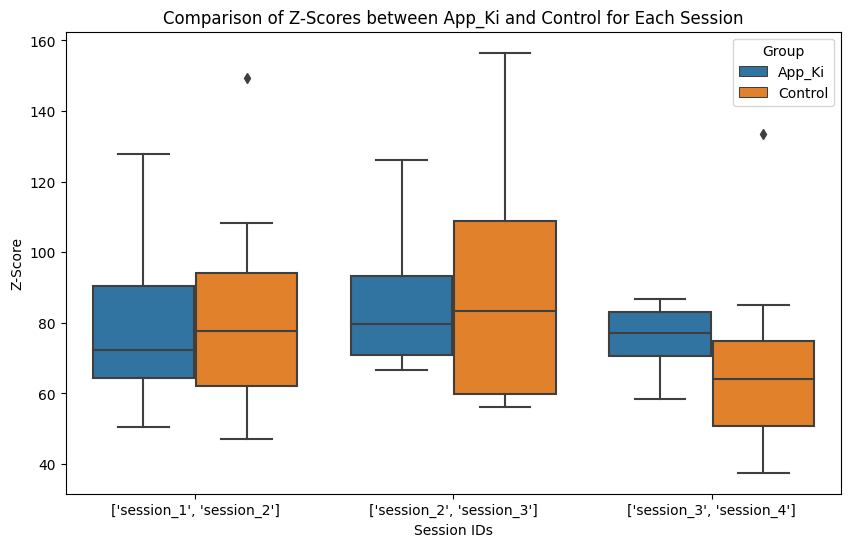

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by session_ids and name, and calculate the mean z_score
grouped_data = df.groupby(['session_ids', 'name']).mean().reset_index()

# Create a new dataframe for boxplot
boxplot_data = pd.DataFrame(columns=['session_ids', 'group', 'emd'])

for session_id in df['session_ids'].unique():
    session_data = grouped_data[grouped_data['session_ids'] == session_id]
    control_data = session_data[session_data['name'].isin(control)]
    app_ki_data = session_data[session_data['name'].isin(app_ki)]

    session_boxplot_data = pd.DataFrame({
        'session_ids': [session_id] * (len(app_ki_data) + len(control_data)),
        'group':['App_Ki'] * len(app_ki_data) + ['Control'] * len(control_data),
        'emd': np.concatenate([app_ki_data['emd'], control_data['emd']])
    })

    boxplot_data = boxplot_data.append(session_boxplot_data, ignore_index=True)

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='session_ids', y='emd', hue='group', data=boxplot_data)
plt.title('Comparison of Z-Scores between App_Ki and Control for Each Session')
plt.xlabel('Session IDs')
plt.ylabel('Z-Score')
plt.legend(title='Group')
plt.show()


C:\Users\aaoun\AppData\Local\Temp\ipykernel_1296\674468665.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boxplot_data = boxplot_data.append(session_boxplot_data, ignore_index=True)


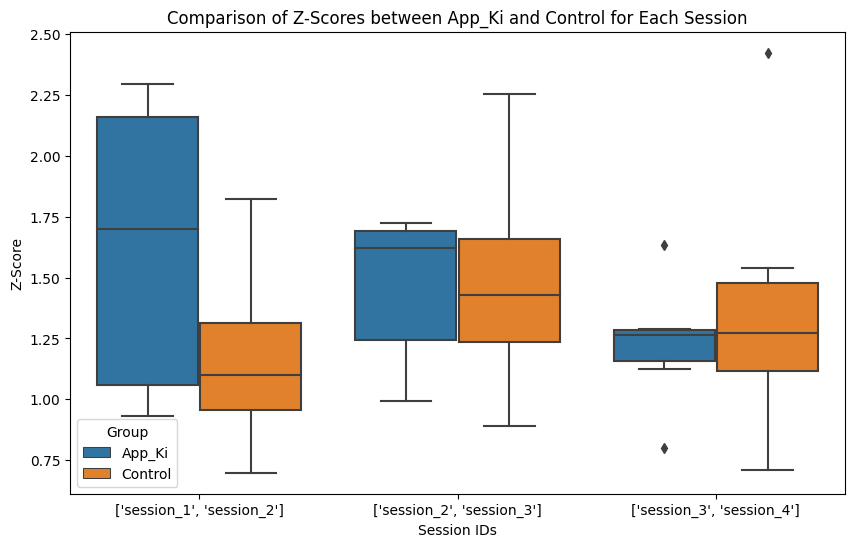

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by session_ids and name, and calculate the mean z_score
grouped_data = df.groupby(['session_ids', 'name']).mean().reset_index()

# Create a new dataframe for boxplot
boxplot_data = pd.DataFrame(columns=['session_ids', 'group', 'fr_rate_ratio'])

for session_id in df['session_ids'].unique():
    session_data = grouped_data[grouped_data['session_ids'] == session_id]
    control_data = session_data[session_data['name'].isin(control)]
    app_ki_data = session_data[session_data['name'].isin(app_ki)]

    session_boxplot_data = pd.DataFrame({
        'session_ids': [session_id] * (len(app_ki_data) + len(control_data)),
        'group':['App_Ki'] * len(app_ki_data) + ['Control'] * len(control_data),
        'fr_rate_ratio': np.concatenate([app_ki_data['fr_rate_ratio'], control_data['fr_rate_ratio']])
    })

    boxplot_data = boxplot_data.append(session_boxplot_data, ignore_index=True)

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='session_ids', y='fr_rate_ratio', hue='group', data=boxplot_data)
plt.title('Comparison of Z-Scores between App_Ki and Control for Each Session')
plt.xlabel('Session IDs')
plt.ylabel('Z-Score')
plt.legend(title='Group')
plt.show()


C:\Users\aaoun\AppData\Local\Temp\ipykernel_1296\1143722991.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boxplot_data = boxplot_data.append(session_boxplot_data, ignore_index=True)


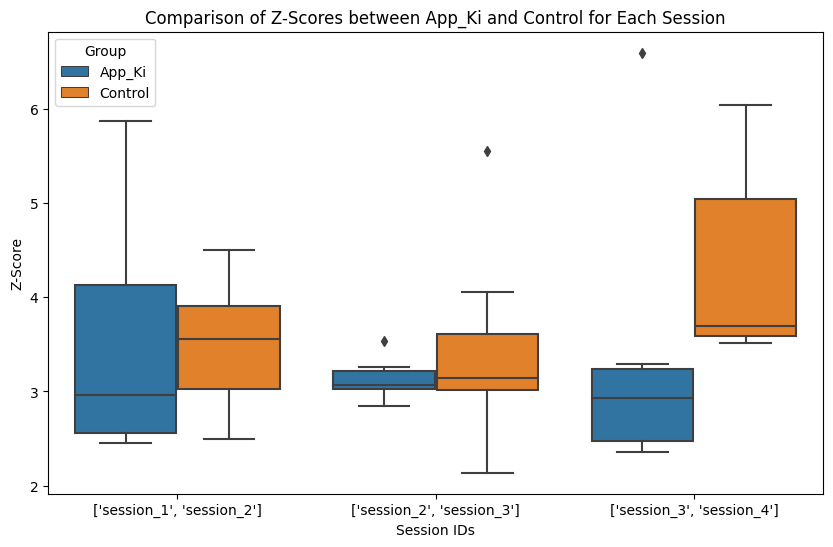

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by session_ids and name, and calculate the mean z_score
grouped_data = df.groupby(['session_ids', 'name']).mean().reset_index()

# Create a new dataframe for boxplot
boxplot_data = pd.DataFrame(columns=['session_ids', 'group', 'spike_density_wass'])

for session_id in df['session_ids'].unique():
    session_data = grouped_data[grouped_data['session_ids'] == session_id]
    control_data = session_data[session_data['name'].isin(control)]
    app_ki_data = session_data[session_data['name'].isin(app_ki)]

    session_boxplot_data = pd.DataFrame({
        'session_ids': [session_id] * (len(app_ki_data) + len(control_data)),
        'group':['App_Ki'] * len(app_ki_data) + ['Control'] * len(control_data),
        'spike_density_wass': np.concatenate([app_ki_data['spike_density_wass'], control_data['spike_density_wass']])
    })

    boxplot_data = boxplot_data.append(session_boxplot_data, ignore_index=True)

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='session_ids', y='spike_density_wass', hue='group', data=boxplot_data)
plt.title('Comparison of Z-Scores between App_Ki and Control for Each Session')
plt.xlabel('Session IDs')
plt.ylabel('Z-Score')
plt.legend(title='Group')
plt.show()


In [ ]:
grouped_data.columns

Index(['session_ids', 'name', 'date', 'tetrode', 'unit_id', 'whole_wass',
       'z_score', 'p_value', 'base_mean', 'base_std', 'mod_z_score',
       'mod_p_value', 'median', 'mad', 'spike_density_wass', 'n_repeats',
       'cylinder', 'downsample_factor', 'emd', 'fr_rate_ratio',
       'fr_rate_change'],
      dtype='object')

In [ ]:
df.columns

Index(['signature', 'depth', 'name', 'date', 'tetrode', 'unit_id',
       'session_ids', 'whole_wass', 'z_score', 'p_value', 'base_mean',
       'base_std', 'mod_z_score', 'mod_p_value', 'median', 'mad',
       'spike_density_wass', 'n_repeats', 'arena_size', 'cylinder',
       'ratemap_dims', 'downsample_factor', 'emd', 'fr_rate', 'fr_rate_ratio',
       'fr_rate_change', 'app_vs_control', 'group'],
      dtype='object')

c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\Envs\envPRISM\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


['session_1', 'session_2']
t = 1.6675563539456892
p = 0.09722419386676347
['session_2', 'session_3']
t = 0.032403121536514354
p = 0.9741829147361865
['session_3', 'session_4']
t = -0.7016127701588832
p = 0.4838455260275104


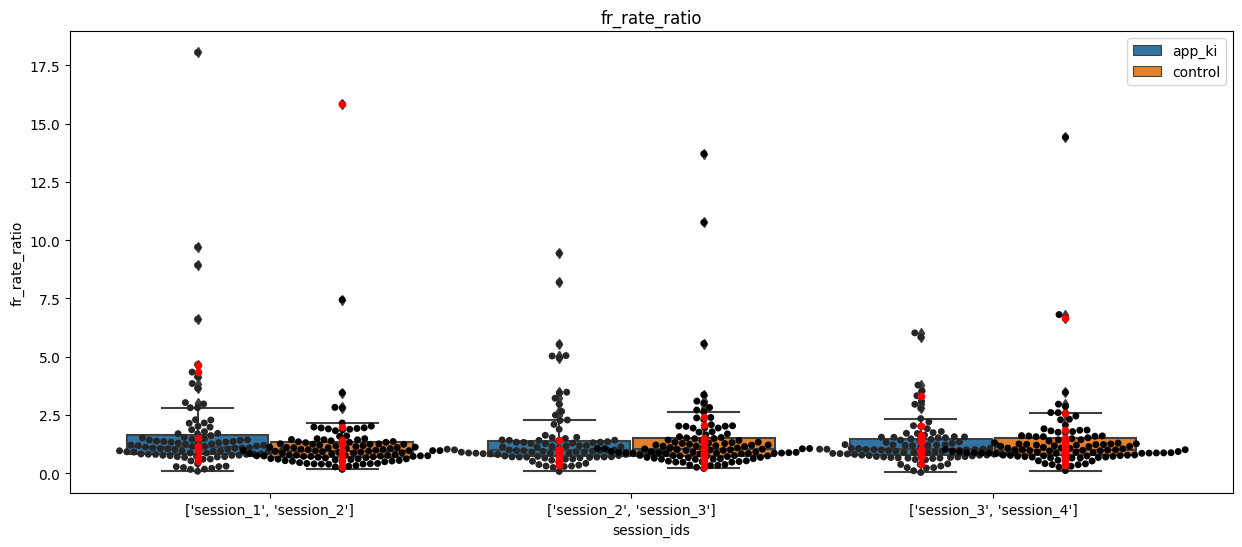

In [ ]:
df['group'] = np.where(df['name'].isin(control), 'control', 'app_ki')
# significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
# non_significant_mask = ~significant_mask
# sig_outlier_count = len(df[(df['z_score'] > 4) | (df['z_score'] < -4) & significant_mask])
# nsig_outlier_count = len(df[(df['z_score'] > 4) | (df['z_score'] < -4) & non_significant_mask])

metric = 'fr_rate_ratio'
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x="session_ids", y=metric, hue="group", data=df, ax=ax)
sns.swarmplot(x="session_ids", y=metric, hue="group", data=df, color='black', dodge=0.1, ax=ax)
sig_points = df[(df['p_value'] <= 0.025) | (df['p_value'] >= 0.975)]

unique_sessions = df['session_ids'].unique()
num_groups = len(df['group'].unique())
group_offsets = np.linspace(-0.2, 0.2, num_groups)

for i, session in enumerate(unique_sessions):
    session_data = df[df['session_ids'] == session]
    for j, group in enumerate(session_data['group'].unique()):
        group_data = session_data[session_data['group'] == group]
        sig_points = group_data[(group_data['p_value'] <= 0.025) | (group_data['p_value'] >= 0.975)]
        x = [i + group_offsets[j]] * len(sig_points)
        ax.scatter(x=x, y=sig_points[metric], color='red', s=20, zorder=10)


# sns.swarmplot(x="session_ids", y="spike_density_wass", hue="group", data=sig_points, color="red", dodge=0.1, ax=ax)
# ax.set_ylim(-3, 3)
# plt.title('Z-Scores with {} significant outliers and {} non-significant outliers removed'.format(sig_outlier_count, nsig_outlier_count))
plt.title(metric)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title=None)
# add significance to boxplot
session_pairs = df['session_ids'].unique()
for i, session_pair in enumerate(session_pairs):
    app_ki_df = df[(df['session_ids'] == session_pair) & (df['name'].isin(app_ki))]
    control_df = df[(df['session_ids'] == session_pair) & (df['name'].isin(control))]
    app_ki_z_scores = app_ki_df[metric]
    control_z_scores = control_df[metric]
    res = ttest_ind(app_ki_z_scores, control_z_scores, usevar='unequal')
    t = res[0]
    p = res[1]
    # t, p = mannwhitneyu(app_ki_z_scores, control_z_scores)
    print(session_pair)
    print('t = ' + str(t))
    print('p = ' + str(p))
    if p <= 0.05:
        x_pos = session_pairs.tolist().index(session_pair)
        y_pos = max(df[df['session_ids'] == session_pair][metric]) + 0.1  # Adjust the vertical position of the "*"
        significance = "*"
        ax.text(x_pos, y_pos, significance, ha='center', va='bottom', color='red')
        # ax.text(i, 2.5, '*', fontsize=20, horizontalalignment='center', verticalalignment='center')

plt.show()


c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\Envs\envPRISM\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


['session_1', 'session_2']
t = 4491.0
p = 0.15052273558679824
['session_2', 'session_3']
t = 5063.0
p = 0.9529122576173686
['session_3', 'session_4']
t = 5100.0
p = 0.9778875760815788


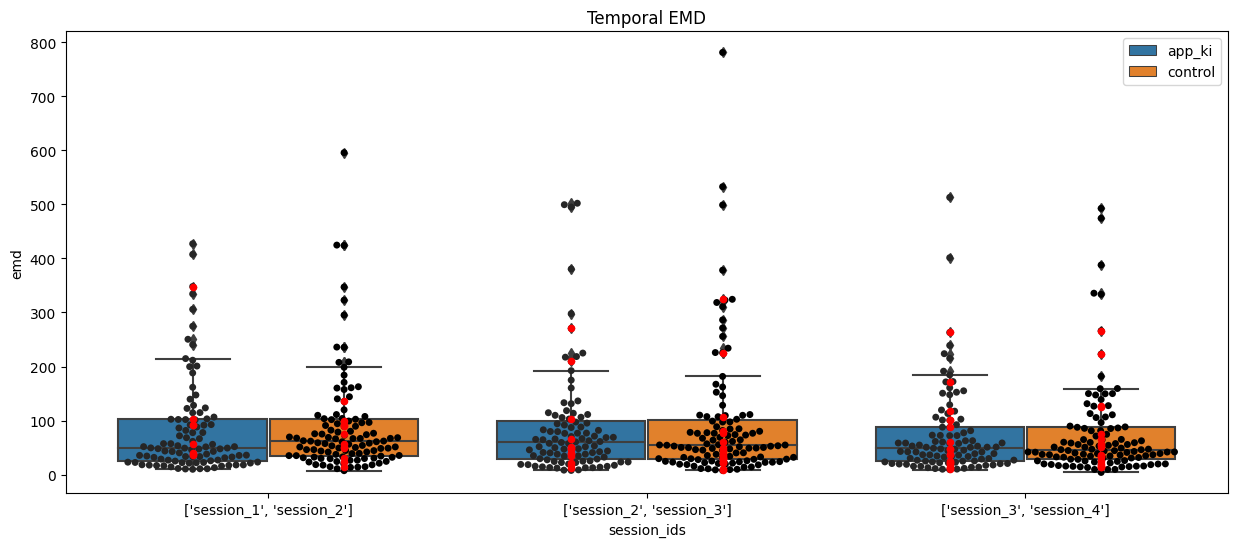

In [ ]:
df['group'] = np.where(df['name'].isin(control), 'control', 'app_ki')
# significant_mask = (df['p_value'] >= 0.975) | (df['p_value'] <= 0.025)
# non_significant_mask = ~significant_mask
# sig_outlier_count = len(df[(df['z_score'] > 4) | (df['z_score'] < -4) & significant_mask])
# nsig_outlier_count = len(df[(df['z_score'] > 4) | (df['z_score'] < -4) & non_significant_mask])

fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x="session_ids", y="emd", hue="group", data=df, ax=ax)
sns.swarmplot(x="session_ids", y="emd", hue="group", data=df, color='black', dodge=0.1, ax=ax)
sig_points = df[(df['p_value'] <= 0.025) | (df['p_value'] >= 0.975)]

unique_sessions = df['session_ids'].unique()
num_groups = len(df['group'].unique())
group_offsets = np.linspace(-0.2, 0.2, num_groups)

for i, session in enumerate(unique_sessions):
    session_data = df[df['session_ids'] == session]
    for j, group in enumerate(session_data['group'].unique()):
        group_data = session_data[session_data['group'] == group]
        sig_points = group_data[(group_data['p_value'] <= 0.025) | (group_data['p_value'] >= 0.975)]
        x = [i + group_offsets[j]] * len(sig_points)
        ax.scatter(x=x, y=sig_points['emd'], color='red', s=20, zorder=10)


# sns.swarmplot(x="session_ids", y="spike_density_wass", hue="group", data=sig_points, color="red", dodge=0.1, ax=ax)
# ax.set_ylim(-3, 3)
# plt.title('Z-Scores with {} significant outliers and {} non-significant outliers removed'.format(sig_outlier_count, nsig_outlier_count))
plt.title('Temporal EMD')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title=None)
# add significance to boxplot
session_pairs = df['session_ids'].unique()
for i, session_pair in enumerate(session_pairs):
    app_ki_df = df[(df['session_ids'] == session_pair) & (df['name'].isin(app_ki))]
    control_df = df[(df['session_ids'] == session_pair) & (df['name'].isin(control))]
    app_ki_z_scores = app_ki_df['emd']
    control_z_scores = control_df['emd']
    # t, p = ttest_ind(app_ki_z_scores, control_z_scores)
    t, p = mannwhitneyu(app_ki_z_scores, control_z_scores)
    print(session_pair)
    print('t = ' + str(t))
    print('p = ' + str(p))
    if p <= 0.05:
        x_pos = session_pairs.tolist().index(session_pair)
        y_pos = max(df[df['session_ids'] == session_pair]['emd']) + 0.1  # Adjust the vertical position of the "*"
        significance = "*"
        ax.text(x_pos, y_pos, significance, ha='center', va='bottom', color='red')
        # ax.text(i, 2.5, '*', fontsize=20, horizontalalignment='center', verticalalignment='center')

plt.show()


In [ ]:
sig_points['group']

134    control
149    control
173    control
185    control
191    control
194    control
203    control
206    control
224    control
227    control
392    control
410    control
428    control
437    control
455    control
572    control
587    control
Name: group, dtype: object

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

session_pairs = [("['session_1', 'session_2']", 'negative'), ("['session_2', 'session_3']", 'negative'), ("['session_3', 'session_4']", 'positive')]

for session_pair in session_pairs:
    print(session_pair)
    session_id, hypothesis = session_pair
    control_df = df[(df['group'] == 'control') & (df['session_ids'] == session_id)]
    control_diff_values = control_df['z_score']

    # if hypothesis == 'negative':
    #     control_growth_curve_test = stats.ttest_1samp(control_diff_values, 0, alternative='less')
    # elif hypothesis == 'positive':
    #     control_growth_curve_test = stats.ttest_1samp(control_diff_values, 0, alternative='greater')

    control_growth_curve_test = stats.ttest_1samp(control_diff_values, 0, alternative='two-sided')
    # try non-parametric test
    # control_growth_curve_test = stats.wilcoxon(control_diff_values)

    if control_growth_curve_test.statistic < 0:
        hypothesis = 'negative'
    elif control_growth_curve_test.statistic > 0:
        hypothesis = 'positive'
    else:
        hypothesis = 'positive or negative'

    if control_growth_curve_test.pvalue <= 0.025 or control_growth_curve_test.pvalue >= 0.975:
        print(f"Control group exhibits a significant {hypothesis} growth curve for session pair {session_id}.")
        print(f"p-value: {control_growth_curve_test.pvalue}")
    else:
        print(f"Control group does not exhibit a significant {hypothesis} growth curve for session pair {session_id}.")
        print(f"p-value: {control_growth_curve_test.pvalue}")

    # Repeat the same analysis for the pathological group if needed
    pathological_df = df[(df['group'] == 'app_ki') & (df['session_ids'] == session_id)]
    pathological_diff_values = pathological_df['fr_rate_ratio']

    # if hypothesis == 'negative':
    #     pathological_growth_curve_test = stats.ttest_1samp(pathological_diff_values, 0, alternative='less')
    # elif hypothesis == 'positive':
    pathological_growth_curve_test = stats.ttest_1samp(pathological_diff_values, 0, alternative='two-sided')
    # pathological_growth_curve_test = stats.wilcoxon(pathological_diff_values)   
    if pathological_growth_curve_test.statistic < 0:
        hypothesis = 'negative'
    elif pathological_growth_curve_test.statistic > 0:
        hypothesis = 'positive'
    else:
        hypothesis = 'positive or negative'

    if pathological_growth_curve_test.pvalue <= 0.025 or pathological_growth_curve_test.pvalue >= 0.975:
        print(f"Pathological group exhibits a significant {hypothesis} growth curve for session pair {session_id}.")
        print(f"p-value: {pathological_growth_curve_test.pvalue}")
    else:
        print(f"Pathological group does not exhibit a significant {hypothesis} growth curve for session pair {session_id}.")
        print(f"p-value: {pathological_growth_curve_test.pvalue}")


("['session_1', 'session_2']", 'negative')
Control group does not exhibit a significant positive growth curve for session pair ['session_1', 'session_2'].
p-value: 0.19004602767455137
Pathological group exhibits a significant positive growth curve for session pair ['session_1', 'session_2'].
p-value: 5.669933564495237e-11
("['session_2', 'session_3']", 'negative')
Control group exhibits a significant positive growth curve for session pair ['session_2', 'session_3'].
p-value: 0.0011206686516230342
Pathological group exhibits a significant positive growth curve for session pair ['session_2', 'session_3'].
p-value: 2.5613958870398907e-15
("['session_3', 'session_4']", 'positive')
Control group exhibits a significant positive growth curve for session pair ['session_3', 'session_4'].
p-value: 9.434687104858619e-05
Pathological group exhibits a significant positive growth curve for session pair ['session_3', 'session_4'].
p-value: 3.0506653452594286e-22


In [ ]:
df['session_ids'][0]

"['session_1', 'session_2']"